<a href="https://colab.research.google.com/github/k9-Ashish/NYC_Taxi_Trip_Time_Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction__Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - NYC Taxi Trip Time Prediction

##### **Project Type**    - NYC Taxi Trip Time Prediction (ML Regression)
##### **Contribution**    - Individual
##### **Team Member 1 - <b>Ashish Kumar</b>

# **Github Link -**

Please provide Github link here.

## <b> Problem Description </b>

### Your objective is to construct a predictive model capable of estimating the complete duration of taxi journeys in New York City. The central dataset at your disposal originates from the NYC Taxi and Limousine Commission. This dataset encompasses pickup timestamps, geographical coordinates, passenger count, and a variety of other factors.

## <b> Data Description </b>

### The dataset we are working with originates from the 2016 NYC Yellow Cab trip records, which have been made accessible through Google Cloud Platform's Big Query. These records were initially released by the NYC Taxi and Limousine Commission (TLC). For this project, the data was both sampled and refined. Your task involves using specific attributes of each trip to forecast the duration of trips in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* **ID:** Unique trip identifier.
* **Vendor ID:** Code indicating the service provider for the trip.
* **Pickup Date & Time:** When the taxi ride started.
* **Dropoff Date & Time:** When the taxi ride ended.
* **Passenger Count:** Number of passengers (as entered by the driver).
* **Pickup Longitude & Latitude:** Geographic coordinates where the ride began.
* **Dropoff Longitude & Latitude:** Geographic coordinates where the ride ended.
* **Store and Forward Flag:** Whether the trip data was stored in the vehicle's memory due to a lack of server connection.
* **Trip Duration:** Duration of the trip in seconds.

# Importing Required Libraries

In [1]:
!pip install haversine

In [44]:
# To load data from file
import pandas as pd

# To perform mathemetiacal operations
import numpy as np

from scipy import stats as st

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
# To calculate the distance between two locations
from haversine import haversine, Unit

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
sns.set_palette('gist_ncar')

In [3]:
# Mount the drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the Dataset from csv file

In [4]:
# Using pandas read_csv method to load the data
path = '/content/drive/MyDrive/NYC Taxi Data.csv'
data = pd.read_csv(path)

### Get the first 5 rows of the data.

In [5]:
# using pandas head function.

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Getting the last 5 rows of the data.

In [6]:
# using pandas tail function.

data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Get the columns present in our data.

In [7]:
# using pandas columns method

print('Columns in our data:')

data.columns.tolist()

Columns in our data:


['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

### Get the shape of the data.

In [8]:
# using pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
data.shape

Shape of our dataset : 


(1458644, 11)

In [9]:
print('Number of columns : ',data.shape[1],'\n')

print('number of rows : ',data.shape[0])

Number of columns :  11 

number of rows :  1458644


* <b>Checking the data types of each column</b>

In [10]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# Inference:
* As we can see here that <b>pickup_datetime</b> and <b>'dropoff_datetime'</b> is not in proper data type i.e <b>'datetime'</b>.

In [11]:
# Converting pickup_datetime and 'dropoff_datetime' to datetime using pandas to_datetime method

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [13]:
# Again Checking data types

data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

* Now we can see that <b>pickup_datetime</b> and <b>'dropoff_datetime'</b> is now in required data type i.e <b>datetime</b>.

### Getting the type of data present in columns.

In [14]:
# printing the number of numerical features and number of categorical features

num_col = data.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 7

The number of Categorical columns are: 2


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


#### Summary Statistic of the numeric columns

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


#### Summary Statistic of object form data of columns

In [17]:
data.describe(include = 'object').T

,count,unique,top,freq
id,1458644,1458644,id2875421,1
store_and_fwd_flag,1458644,2,N,1450599


In [18]:
# In our dataset there are lots of unique values in lots of columns
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [19]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [20]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,vendor_id,2
1,store_and_fwd_flag,2
2,passenger_count,10
3,trip_duration,7417
4,pickup_longitude,23047
5,dropoff_longitude,33821
6,pickup_latitude,45245
7,dropoff_latitude,62519
8,pickup_datetime,1380222
9,dropoff_datetime,1380377


### Data Cleaning and Removal of duplicate enteries from the Data

Before we dive into analyzing the dataset, it's crucial to clean the data to ensure accurate results during exploratory data analysis (EDA). Here's how we're approaching data cleaning:

* **Identify Missing Data:** We'll pinpoint where data is missing.
* **Handle Missing Data:** We'll decide how to deal with the missing data effectively.
* **Detect Duplicate Data:** We'll look for any repeated entries in the dataset.
* **Remove Duplicate Data:** If duplicates are found, we'll remove them to avoid redundancy.

* <b>Getting missing data</b>

In [23]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


# Inference

* Here we can see that there is <b>no missing value</b> in any feature of our data.


* So we do not require to perform the missing values handling task

* <b>Checking for duplicate data</b>

In [24]:
data[data.duplicated()].size

0

* There is also <b>not any duplicate data</b> present in our dataset.

### Data Pre-processing


* It's evident that our current dataset lacks certain details crucial for grasping the full context of the problem. For instance, we're missing the ability to analyze customer trends and demand for taxi services. We're unaware of peak hours and days when taxi usage is high or low.

1. We're missing data categorized by months for taxi trips.

2. Data categorized by weeks and days of the week is absent.

3. We lack data segmented by hours, which is vital for identifying peak demand hours.

4. The distance between pickup and drop-off locations for taxi trips is not available.

* To address these gaps, we will introduce new columns containing the necessary information. This step will allow us to delve deeper into the dataset and extract more meaningful insights.

* Creating <b>pickup_month</b> and <b>dropoff_month</b> that will contain the month in which the taxi trip was taken.

In [25]:
# using pandas dt.month attribute to extract the month from our datetime columns.

data['pickup_month'] = data['pickup_datetime'].dt.month
data['dropoff_month'] = data['dropoff_datetime'].dt.month

* Creating <b>pickup_weekday</b> and <b>dropoff_weekday</b> that will contain the week day in which the taxi trip was taken.

In [26]:
# using pandas dt.weekday attribute to extract the weekday from our datetime columns.

data['pickup_weekday'] = data['pickup_datetime'].dt.weekday
data['dropoff_weekday'] = data['dropoff_datetime'].dt.weekday

<b> 0 - Monday | 1 - Tuesday | 2 - Wednesday | 3 - Thursday | 4 - Friday | 5 - Saturday | 6 - Sunday</b>

* Creating <b>pickup_hour</b> and <b>dropoff_hour</b> that will contain the name of hour in which the taxi trip was taken.

In [27]:
# using pandas dt.hour attribute to extract the weekday from our datetime columns.

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

* Creating <b>pickup_minutes</b> and <b>dropoff_minutes</b> that will contain the minute in which the taxi trip was taken and completed.

In [28]:
# using pandas minute attribute to extract the weekday from our datetime columns.

data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['dropoff_minute'] = data['dropoff_datetime'].dt.minute

* Creating <b>pickup_day</b> and <b>dropoff_dat</b> that will contain the day number of the month in which the taxi trip was taken and completed.

In [29]:
# using pandas day attribute to extract the month day number from our datetime columns.

data['pickup_day'] = data['pickup_datetime'].dt.day
data['dropoff_day'] = data['dropoff_datetime'].dt.day

* Next, we're going to add a new column that holds the distance for each taxi trip.

Here's how we'll do it:

* We already have columns with pickup and dropoff location coordinates - pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude.
We'll utilize these coordinates to determine the starting and ending points of each trip.
* To calculate the distance between these locations using longitude and latitude, we'll apply the Haversine Formula.
For this purpose, we've imported a library named "haversine" in Python.

In [35]:
# Import the haversine library
from haversine import haversine

# Define the function to calculate distance
def calculate_distance(pickup_long, pickup_lat, dropoff_long, dropoff_lat):
    start_loc = (pickup_lat, pickup_long)  # Fix the order of latitude and longitude
    drop_loc = (dropoff_lat, dropoff_long)  # Fix the order of latitude and longitude
    return haversine(start_loc, drop_loc, unit='km')




* we will create a column <b>trip_distance</b> which contain the <b>distance</b> for each taxi trip.

In [36]:
# Apply the function to create the 'trip_distance' column
data['trip_distance'] = data.apply(lambda x: calculate_distance(x['pickup_longitude'],
                                                                x['pickup_latitude'],
                                                                x['dropoff_longitude'],
                                                                x['dropoff_latitude']), axis=1)

In [37]:
# Again checking data types of all columns

data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
dropoff_month                  int64
pickup_weekday                 int64
dropoff_weekday                int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
pickup_day                     int64
dropoff_day                    int64
trip_distance                float64
dtype: object

In [38]:
# Now again checking top 5 rows from our data

data.head().T

,0,1,2,3,4
id,id2875421,id2377394,id3858529,id3504673,id2181028
vendor_id,2,1,2,2,2
pickup_datetime,2016-03-14 17:24:55,2016-06-12 00:43:35,2016-01-19 11:35:24,2016-04-06 19:32:31,2016-03-26 13:30:55
dropoff_datetime,2016-03-14 17:32:30,2016-06-12 00:54:38,2016-01-19 12:10:48,2016-04-06 19:39:40,2016-03-26 13:38:10
passenger_count,1,1,1,1,1
pickup_longitude,-73.982155,-73.980415,-73.979027,-74.01004,-73.973053
pickup_latitude,40.767937,40.738564,40.763939,40.719971,40.793209
dropoff_longitude,-73.96463,-73.999481,-74.005333,-74.012268,-73.972923
dropoff_latitude,40.765602,40.731152,40.710087,40.706718,40.78252
store_and_fwd_flag,N,N,N,N,N


* We can see that we have successfully created the columns which will help us to deep dive into our data and make our analysis more insight full.

### Let's Explore Variables(Features) Present in our Dataset

In [39]:
# Checking unique passenger count in passenger_columnnusing pandas value_count method

data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

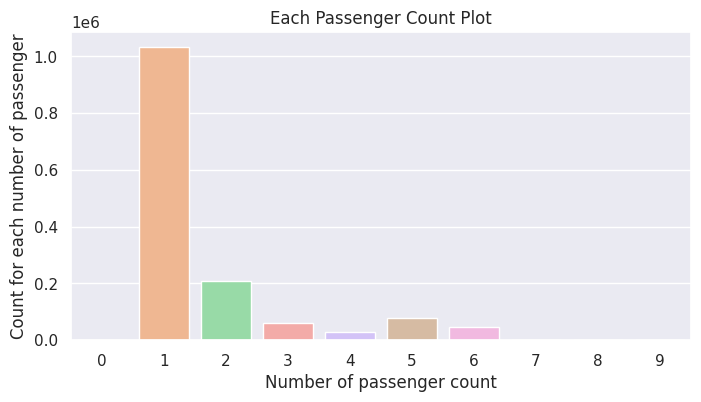

In [49]:
# ploting count plot for passenger_count column so we can get more clearity
# we are using count plot from seaborn.

import matplotlib.pyplot as plt
import seaborn as sns

# Specify a font family that is available on your system
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

plt.figure(figsize=(8, 4))
sns.countplot(data= data , x = 'passenger_count',palette = 'pastel')

plt.title('Each Passenger Count Plot')

plt.xlabel('Number of passenger count')
plt.ylabel('Count for each number of passenger')

plt.show()



# Inference
* Here we can see that there is no trip if <b>passenger_count</b> is <b>0</b> but there are trip registered in the data where <b>passenger_count</b> is <b>0</b>.
* And also there is <b>exremly low count</b> where <b>passenger_count</b> is <b>7, 8, 9</b> which is <b>affecting our data</b>.

* So we will drop all the rows where <b>passenger_count</b> is <b>0, 7, 8, 9</b>.

In [50]:
# seperating out data where passenger_count = 0

data = data[(data['passenger_count'] != 0) & (data['passenger_count'] <= 6)]

In [51]:
# Checking unique passenger count in passenger_column using pandas value_count method

data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

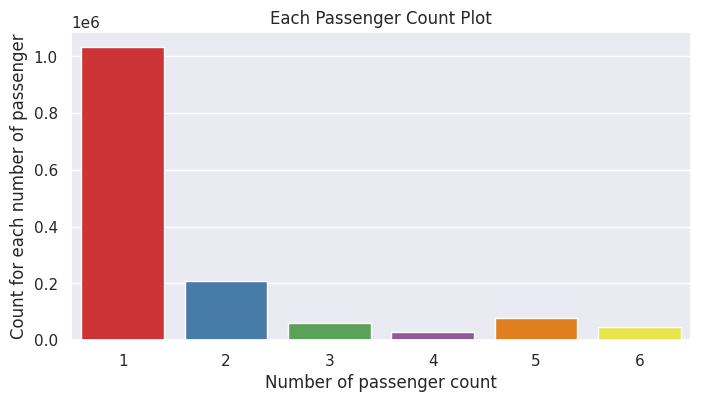

In [52]:
# ploting count plot for passenger_count column so we can get more clearity
# we are using count plot from seaborn.

plt.figure(figsize = (8, 4))
sns.countplot(data = data , x = 'passenger_count', palette = 'Set1')

plt.title('Each Passenger Count Plot')

plt.xlabel('Number of passenger count')
plt.ylabel('Count for each number of passenger')

plt.show()

# Inference:
* We <b>successfully removed</b> all the <b>non required passenger_count</b> from out data.

In [53]:
# Checking distance in trip_distance column using pandas value_count method

data['trip_distance'].value_counts()

0.000000    5887
0.000424     101
0.000424      52
0.000424      48
0.000848      37
            ... 
0.434274       1
3.809274       1
0.563330       1
5.925436       1
1.134044       1
Name: trip_distance, Length: 1452237, dtype: int64

# Inference:
* Observing the data, there are 5887 trips with a distance of 0, which seems unnecessary.

* This could be due to input errors or possibly intentional actions by taxi drivers to falsely register trips.

* Another possibility is that these are canceled trips.

* To address this, we'll eliminate these instances from our dataset.

In [54]:
# seperating our data that will not contail trip distance = 0.0km

data = data[data['trip_distance'] != data['trip_distance'].min()]

In [55]:
# Checking max trip duration from trip_duration column using max method

data['trip_duration'].max()

# Converting this duration to hours by dividing it by 3600

max_trip_hr = data['trip_duration'].max() / 3600

print("The Max trip hour is : ", max_trip_hr)

The Max trip hour is :  979.5227777777778


* Here we can see that trip of 979 hour is very abnormal trip which is present in our data.

In [56]:
# Also checking other values present in our data

data['trip_duration'].sort_values(ascending= False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1439166          1
467645           1
311745           1
1034341          1
1306890          1
Name: trip_duration, Length: 1452692, dtype: int64

In [57]:
1939736 / 3600

538.8155555555555

# Inference :
* We can see that in some entries there are very high numbers in trip duration.


* 3526282 / 3600 = <b>979.5 Hrs</b>
* 2227612 / 3600 = <b>618.7 Hrs</b>
* 2049578 / 3600 = <b>569.3 Hrs</b>
* 1939736 / 3600 = <b>538.8 Hrs</b>

* We will work on them in outlier treatment section

* **Let us check the distribution for each of the variable**

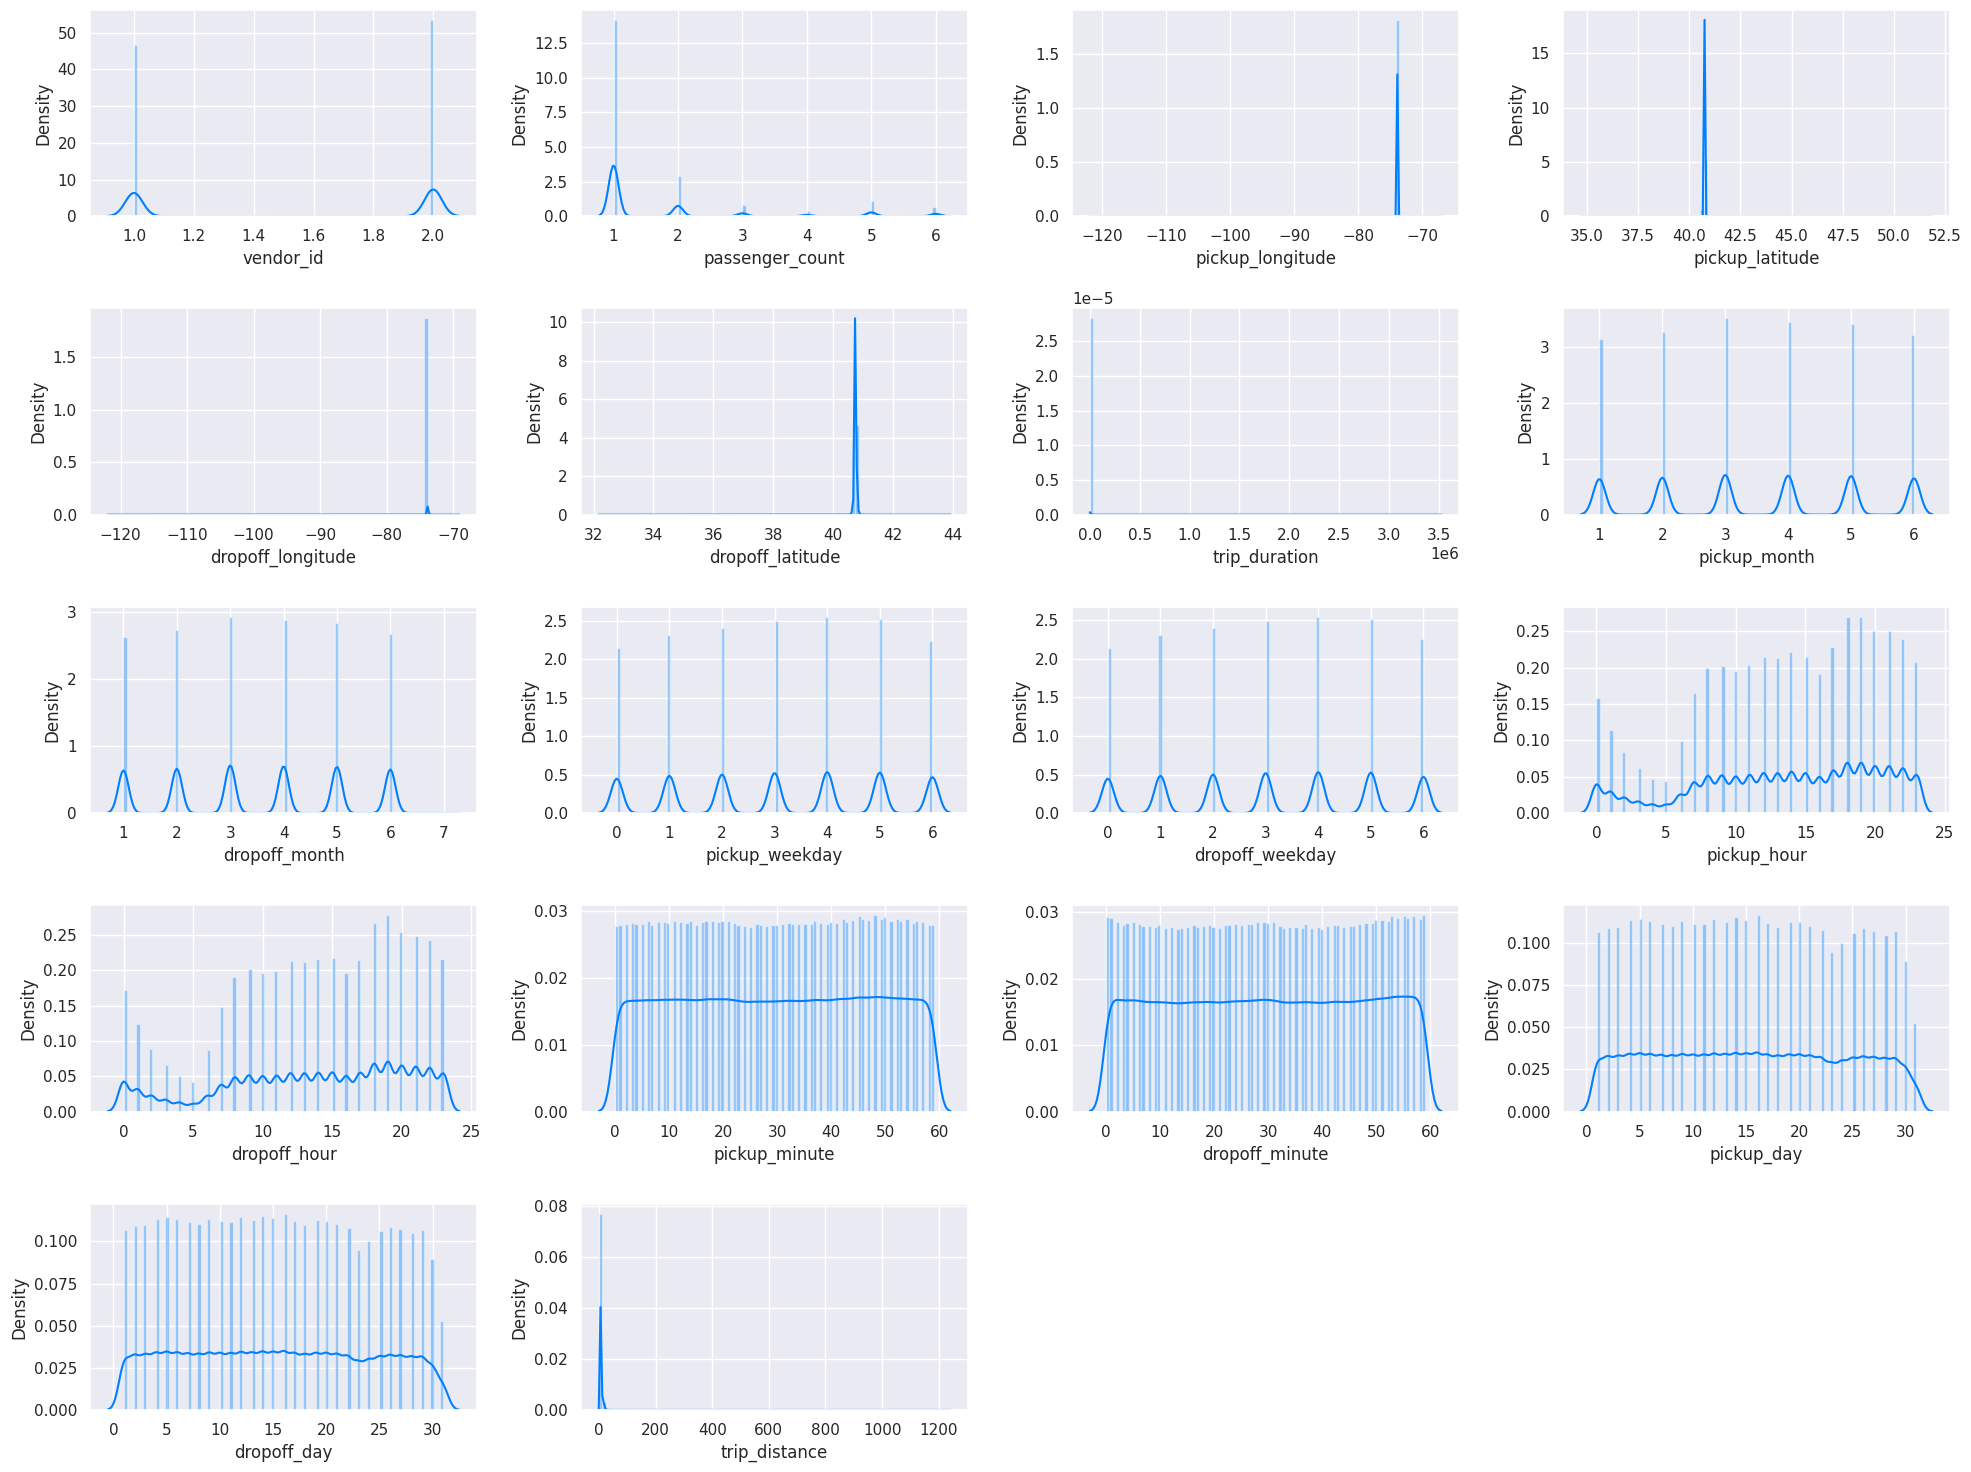

In [58]:
# ploting distribution for each numerical variable present in our data set
# using distplot from seaborn

columns = data.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:

    plt.subplot(5,4,n)

    n = n+1
    sns.distplot(data[column], bins = 100)

    plt.tight_layout()


* Many columns don't have a balanced distribution pattern.
* Latitude and longitude stay unchanged, serving as location markers.
* "Trip_duration" and "trip_distance" stand out due to skewed right tails, hinting at numerous extreme values (outliers).
* Our next step involves addressing these outliers in a meaningful manner.

## Checking Outliers in our data

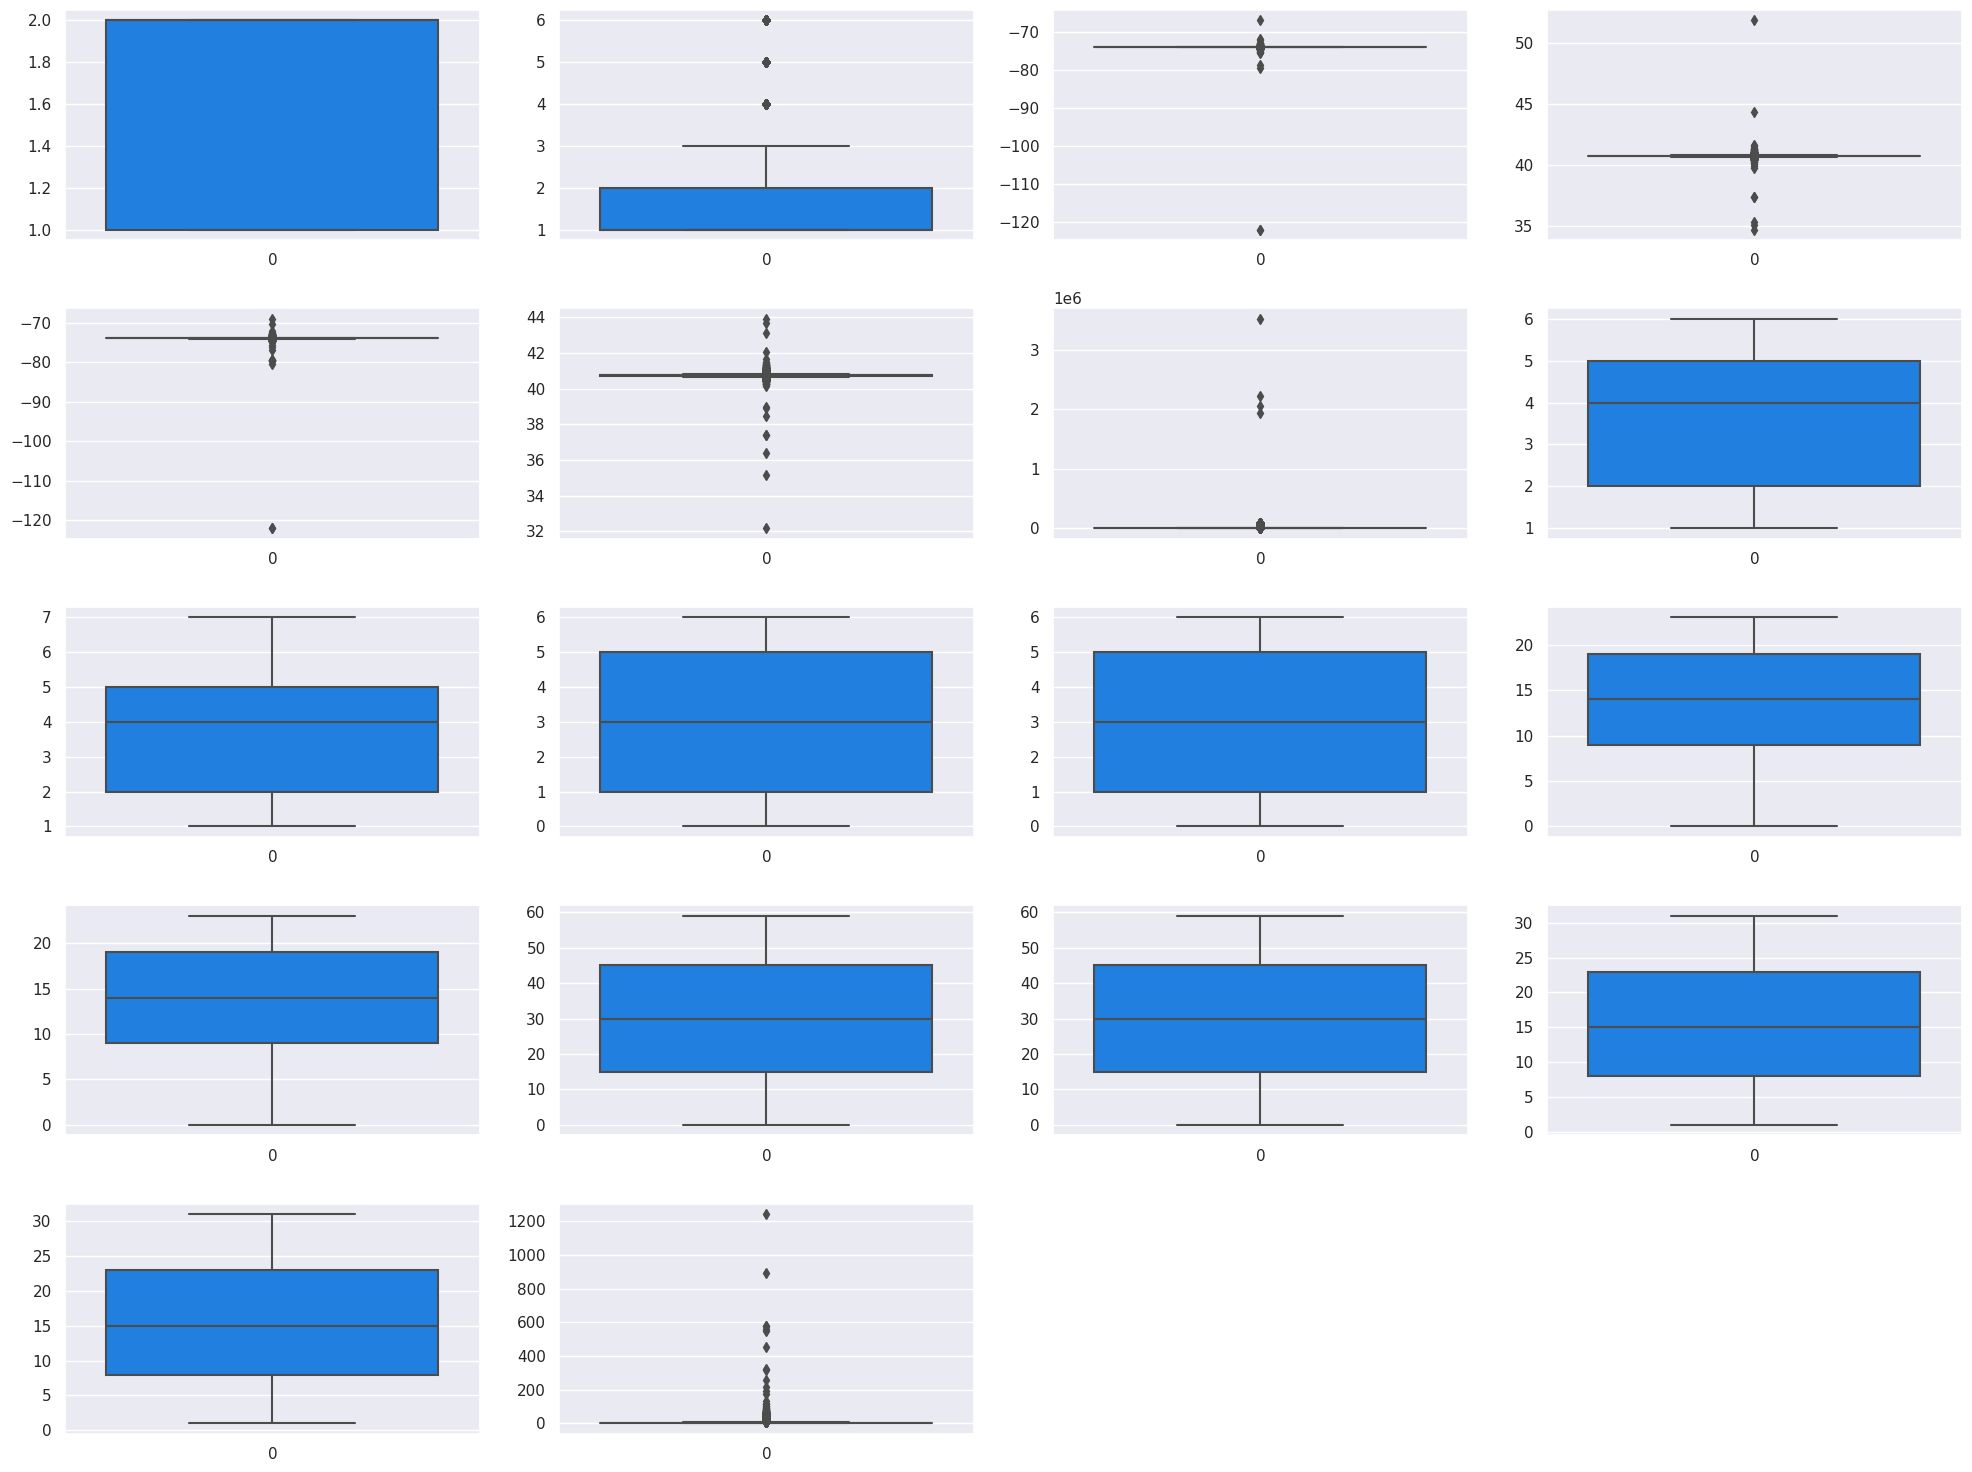

In [59]:
# ploting the box plots into subplots of each column

columns = data.select_dtypes(include=np.number).columns.tolist()
n = 1

plt.figure(figsize=(20,15))

for column in columns:
    plt.subplot(5,4,n)
    n = n+1
    sns.boxplot(data[column])
    plt.tight_layout()


**Our trip duration data is quite varied, featuring both extremely long durations (like trips lasting 900+ hours) and instances with no time recorded.**

* **Applying a three-standard-deviation filter won't fully eliminate outliers because trip durations encompass a wide range of unique times.**
* **To address this, we'll delve into transforming the trip duration data. This approach aims to improve the overall quality and distribution of the information.**

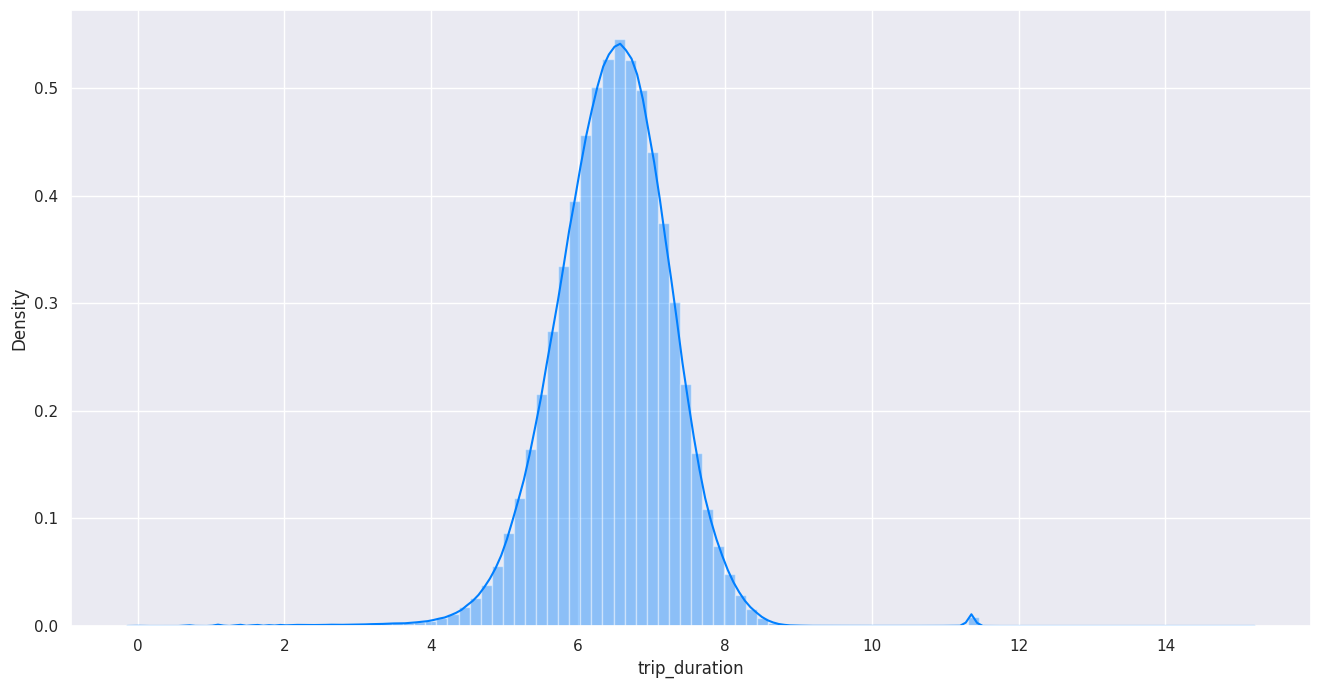

In [62]:
# converting our trip_duration column into log transformation
# and then cheking distribution

plt.figure(figsize=(16, 8))
sns.distplot(np.log(data['trip_duration']), bins = 100)

plt.show()

**Noticeably, the distribution now appears more like a normal distribution, although a small peak remains.**
**Despite this, we'll utilize the log-transformed column for training purposes.**

### Data Analysis Using visualization method that will help us to extract more insights.

### EDA (EXPLORATORY DATA ANALYSIS)

### Univariate Analysis

* <b>Ploting count plot using seaborn to check how much bookings are done for each vendor type.</b>

In [63]:
# Checking unique vendor count in vendor_id nusing pandas value_count method

data['vendor_id'].value_counts()

2    776613
1    676079
Name: vendor_id, dtype: int64

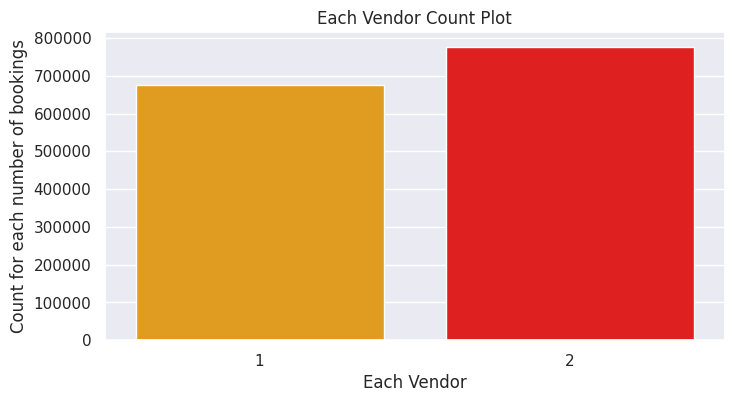

In [64]:
plt.figure(figsize = (8, 4))
sns.countplot(data=data , x = 'vendor_id', palette = ['orange','red'])

plt.title('Each Vendor Count Plot')

plt.xlabel('Each Vendor')
plt.ylabel('Count for each number of bookings')

plt.show()

In [65]:
# Percentage For Vendor_id Column
(data['vendor_id'].value_counts() / data['vendor_id'].count()) * 100

2    53.460265
1    46.539735
Name: vendor_id, dtype: float64

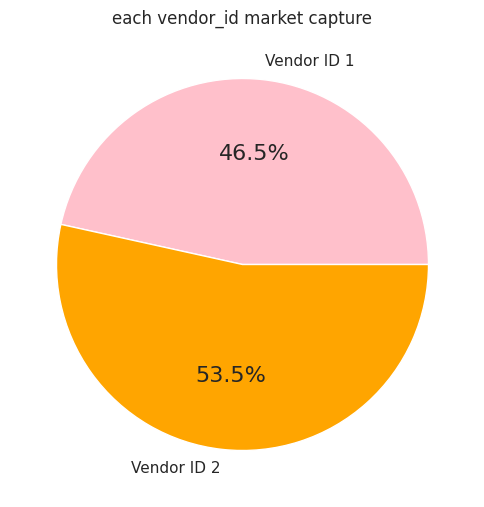

In [69]:
#Calculating percentages of each vendor_id market capture

v1_percntg = abs(len(data[data['vendor_id'] == 1])/len(data)*100)

v2_percntg = abs(len(data[data['vendor_id'] == 2])/len(data)*100)

total_prcntg = [v1_percntg, v2_percntg]

# Creating a pie chart
plt.figure(figsize = (6,8))
colors = ['pink', 'orange']
plt.pie(total_prcntg, labels = ['Vendor ID 1','Vendor ID 2'], autopct = '%.1f%%', colors=colors)

plt.title('each vendor_id market capture')

plt.show()

# Inference :
* We can see that for vendor 2 there are more number of bookings which is of 54 %.

* <b>Checking how much bookings are done for each passenger_count.</b>

In [70]:
# Checking unique vendor count in vendor_id nusing pandas value_count method

data['passenger_count'].value_counts()

1    1029343
2     209505
5      77810
3      59696
6      48063
4      28275
Name: passenger_count, dtype: int64

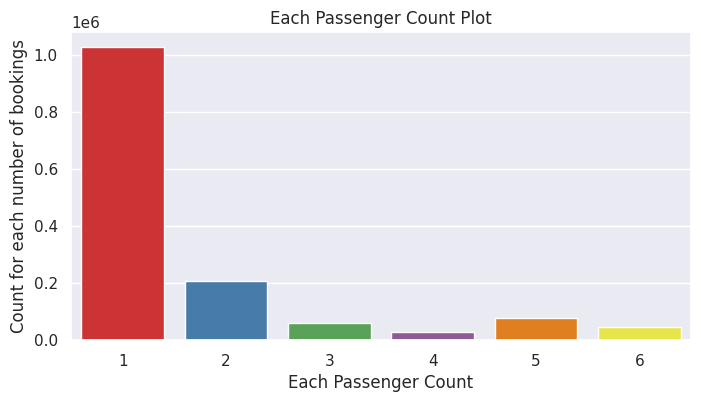

In [72]:
plt.figure(figsize = (8, 4))
sns.countplot(data=data , x = 'passenger_count',palette = 'Set1')

plt.title('Each Passenger Count Plot')

plt.xlabel('Each Passenger Count')
plt.ylabel('Count for each number of bookings')

plt.show()

# Inference :
* We can notice that when a taxi ride is booked by only a single person there are more number of bookings is high as compare to multiple people booking the taxi ride.

* <b>Checking the rate of bookings according to week days</b>

In [73]:
data['pickup_weekday'].value_counts()

4    222604
5    219994
3    217649
2    209293
1    201927
6    194552
0    186673
Name: pickup_weekday, dtype: int64

<b> 0 - Monday | 1 - Tuesday | 2 - Wednesday | 3 - Thursday | 4 - Friday | 5 - Saturday | 6 - Sunday</b>

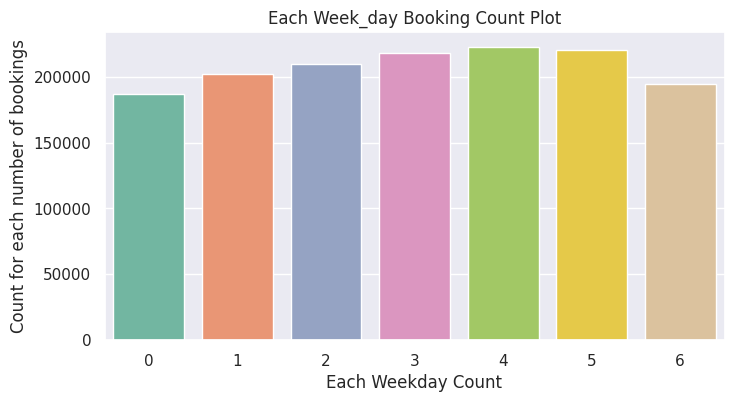

In [74]:
plt.figure(figsize = (8, 4))

sns.countplot(data=data , x = 'pickup_weekday',palette = 'Set2')

plt.title('Each Week_day Booking Count Plot')

plt.xlabel('Each Weekday Count')
plt.ylabel('Count for each number of bookings')

plt.show()

# Inference :
* We can see that on weekends <b> 4 - Friday | 5 - Saturday</b> there are high booking rate for taxi as compare to other days.
* This indicates that people use to go out for their celebrations | parties | or may be for other personel works on weekends.

In [75]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_day,dropoff_day,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,0,0,17,17,24,32,14,14,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,0,0,43,54,12,12,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,11,12,35,10,19,19,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,2,2,19,19,32,39,6,6,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,5,5,13,13,30,38,26,26,1.188590


In [76]:
data['store_and_fwd_flag'].value_counts()

N    1444715
Y       7977
Name: store_and_fwd_flag, dtype: int64

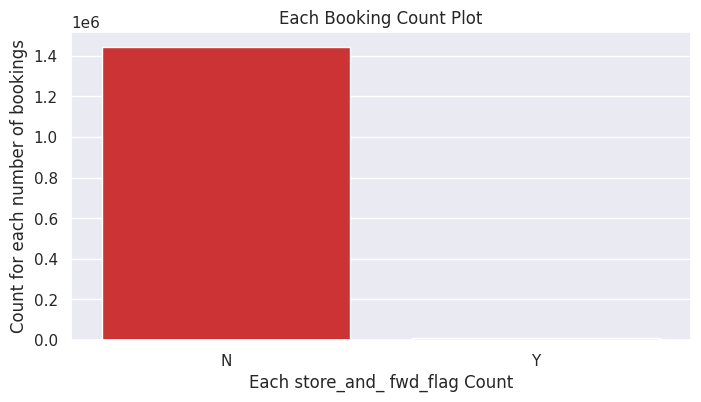

In [80]:
plt.figure(figsize = (8, 4))

sns.countplot(data=data , x = 'store_and_fwd_flag',palette = 'Set1')

plt.title('Each Booking Count Plot')

plt.xlabel('Each store_and_ fwd_flag Count')
plt.ylabel('Count for each number of bookings')

plt.show()

# Inference :
* This shows that there is very less count when the <b>store_and_ fwd_flag</b> is Marked <b>Yes</b> and most of the time the taxi rider haven't connected to the servers of Vendor.

* <b>Checking number of booking hourly.</b>

In [81]:
# Checking unique month count in pickup and dropoff months using pandas value_count method

print('Count of each month pickup count of bookings')
data['pickup_month'].value_counts()

Count of each month pickup count of bookings


3    255204
4    250638
5    247501
2    237336
6    233295
1    228718
Name: pickup_month, dtype: int64

In [82]:
print('Count of each month dropoff count of bookings')
data['dropoff_month'].value_counts()

Count of each month dropoff count of bookings


3    255150
4    250629
5    247569
2    237328
6    233223
1    228667
7       126
Name: dropoff_month, dtype: int64

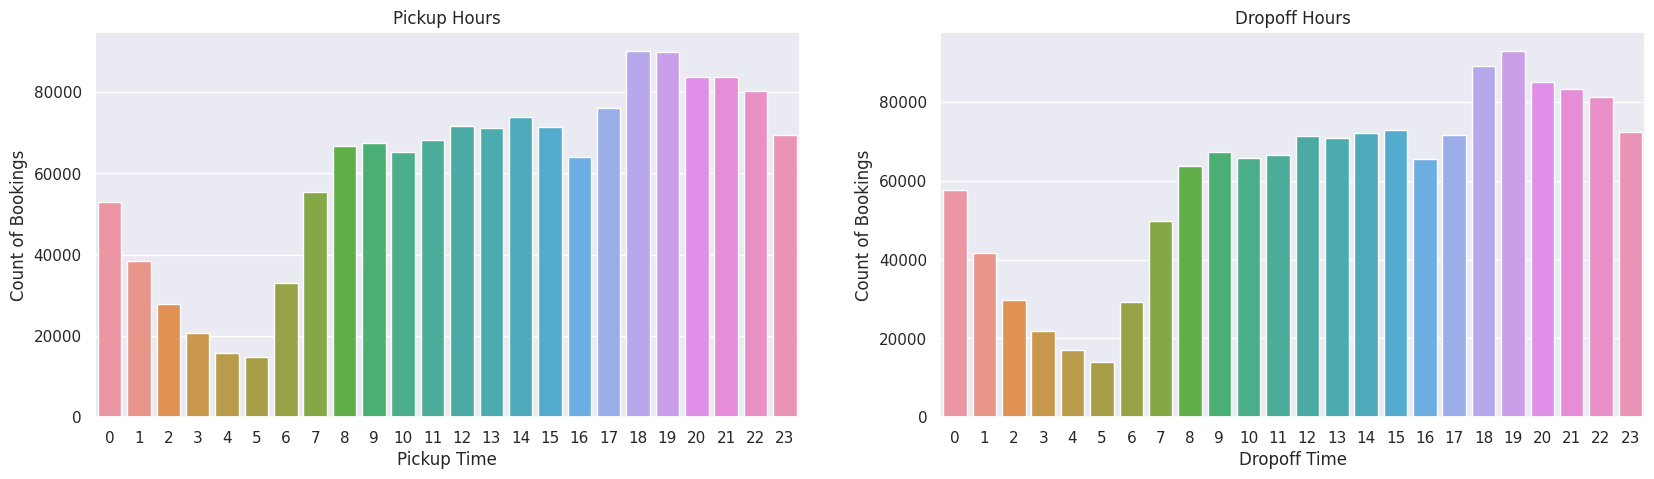

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))

# Ploting pickup time count plot

ax1.set_title('Pickup Hours')
ax = sns.countplot(x = 'pickup_hour', data = data, ax = ax1)
ax.set_xlabel('Pickup Time')
ax.set_ylabel('Count of Bookings')

# Ploting drpopoff time count plot

ax = sns.countplot(data= data , x = 'dropoff_hour',ax = ax2)
ax2.set_title('Dropoff Hours')
ax.set_xlabel('Dropoff Time')
ax.set_ylabel('Count of Bookings')

plt.show()

# Inference :
* We can observe that morning after <b>10 O'Clock</b> people use to book taxi because they want to go out to their work places.
* And at in the <b>evening</b> after <b>6 O'Clock</b> the taxi demand tends to in peak.

* Let us divide our time into particular different parts of the day like <b>Morning | Afternoon | Evening | Night</b> which will help us to understand the booking trend more clearly.



In [84]:
# Creating function that will assign different time of day as per the general day time range.

def day_time(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Night'

In [85]:
# Applying the above funtion using pandas apply function that will map our values and assign to new columns.

data['pickup_day_time']=data['pickup_hour'].apply(day_time)
data['dropoff_day_time']=data['dropoff_hour'].apply(day_time)

In [86]:
# Again checking the top 5 rows of our data

data.head().T

,0,1,2,3,4
id,id2875421,id2377394,id3858529,id3504673,id2181028
vendor_id,2,1,2,2,2
pickup_datetime,2016-03-14 17:24:55,2016-06-12 00:43:35,2016-01-19 11:35:24,2016-04-06 19:32:31,2016-03-26 13:30:55
dropoff_datetime,2016-03-14 17:32:30,2016-06-12 00:54:38,2016-01-19 12:10:48,2016-04-06 19:39:40,2016-03-26 13:38:10
passenger_count,1,1,1,1,1
pickup_longitude,-73.982155,-73.980415,-73.979027,-74.01004,-73.973053
pickup_latitude,40.767937,40.738564,40.763939,40.719971,40.793209
dropoff_longitude,-73.96463,-73.999481,-74.005333,-74.012268,-73.972923
dropoff_latitude,40.765602,40.731152,40.710087,40.706718,40.78252
store_and_fwd_flag,N,N,N,N,N


* We can see that we have successfully created the columns which have day time values.

* <b>Checking the demand of taxi booking in each kind of day time</b>

In [87]:
# checking the value count for each type of day time for pickup and dropoff

print('Pickup Day time value counts')
data['pickup_day_time'].value_counts()

Pickup Day time value counts


Evening      487984
Morning      356051
Night        320394
Afternoon    288263
Name: pickup_day_time, dtype: int64

In [88]:
print('Dropoff Day time value counts')
data['dropoff_day_time'].value_counts()


Dropoff Day time value counts


Evening      487935
Morning      342291
Night        335343
Afternoon    287123
Name: dropoff_day_time, dtype: int64

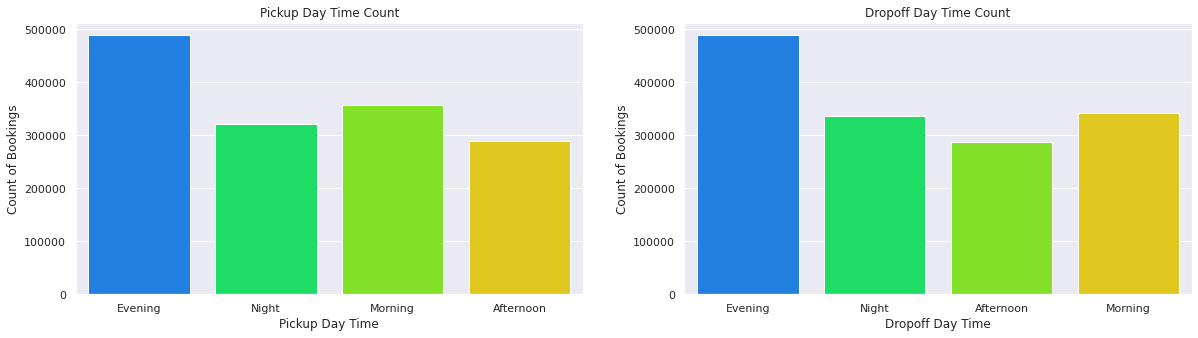

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))

# Ploting pickup Day Time count plot

ax1.set_title('Pickup Day Time Count')
ax = sns.countplot(x = 'pickup_day_time', data = data, ax = ax1)
ax.set_xlabel('Pickup Day Time')
ax.set_ylabel('Count of Bookings')

# Ploting drpopoff Day Time count plot

ax = sns.countplot(data['dropoff_day_time'],ax = ax2)
ax2.set_title('Dropoff Day Time Count')
ax.set_xlabel('Dropoff Day Time')
ax.set_ylabel('Count of Bookings')

plt.show()

# Inference :
* We can see that in both <b>pickup and dropoff day time count plot</b> booking count is maximum in the <b>EVENING</b> day time.

* The slight difference between pickup and dropoff count i.e it is not containing same count it may be because of people book their cabs on weekends and they donot go straight their home but they just go for their weekend enjoyment and the closing of booking is shifted to another day time.

* <b> Let us check the bookings done per month</b>

In [ ]:
# checking the value count for each Month for pickup and dropoff

print('Pickup Month value counts')
data['pickup_month'].value_counts().sort_index()

Pickup Month value counts


1    228718
2    237336
3    255204
4    250638
5    247501
6    233295
Name: pickup_month, dtype: int64

In [ ]:
print('Dropoff Month value counts')
data['dropoff_month'].value_counts().sort_index()

Dropoff Month value counts


1    228667
2    237328
3    255150
4    250629
5    247569
6    233223
7       126
Name: dropoff_month, dtype: int64

* Here we can observe that there is only 6 months in pickup and 7 month in drop-off in which the taxi ride was taken.

* Let us check the data present in our data set

In [ ]:
# Subtracting the starting pickup date from ending pickup date

total_pickup_date_time = data['pickup_datetime'].max() - data['pickup_datetime'].min()

# dividing total_pickup_date_time with numpy mothode that will convert the time difference into months.

total_pickup_date_time = total_pickup_date_time / np.timedelta64(1, 'M')

print('Total pickup datetime:',round(total_pickup_date_time,1))

Total pickup datetime: 6.0


In [ ]:
# Subtracting the starting dropoff date from ending dropoff date

total_dropoff_date_time = data['dropoff_datetime'].max() - data['dropoff_datetime'].min()

total_dropoff_date_time = total_dropoff_date_time / np.timedelta64(1, 'M')

print('Total dropoff datetime:',round(total_dropoff_date_time,1))

Total dropoff datetime: 6.0


* We can observe that the <b>total data</b> is of <b>almost 6 months</b> thats why we are getting only <b>6 months</b> in our month values.

**Comparing Pickup and Dropoff Month Bookings**

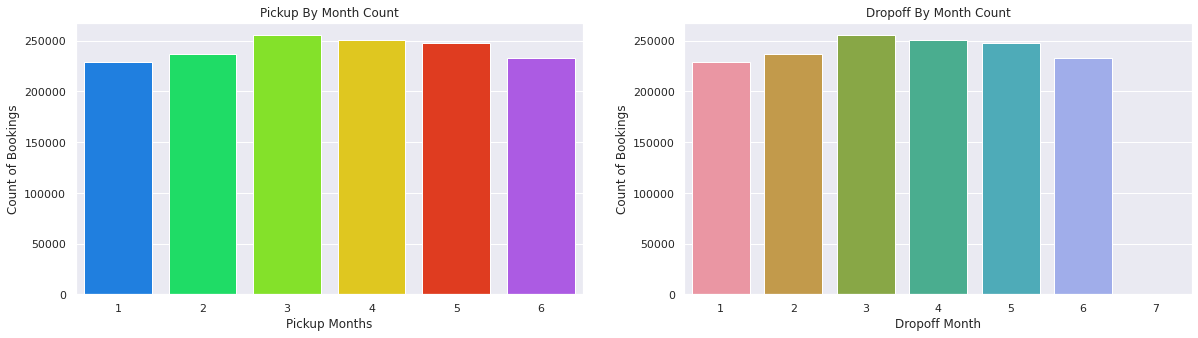

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))

# Ploting pickup by month count plot

ax1.set_title('Pickup By Month Count')
ax = sns.countplot(x = 'pickup_month', data = data, ax = ax1)
ax.set_xlabel('Pickup Months')
ax.set_ylabel('Count of Bookings')

# Ploting drpopoff by month count plot

ax = sns.countplot(data['dropoff_month'],ax = ax2)
ax2.set_title('Dropoff By Month Count')
ax.set_xlabel('Dropoff Month')
ax.set_ylabel('Count of Bookings')

plt.show()

# Inference :
* As we can see that in month of march and april there are more number of taxi booking occured.

### **Bivariate and Multivariate Analysis**

* <b> Checking monthly popularity of vendor</b>

<Figure size 864x432 with 0 Axes>

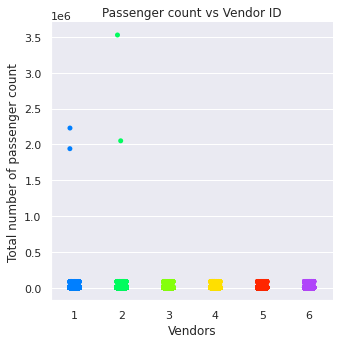

In [ ]:
# Ploting bar graph to get the each month passenger count for each vendor

plt.figure(figsize = (12, 6))

sns.catplot(y = 'trip_duration', x = 'pickup_month', data = data, kind = 'strip')

plt.title('Passenger count vs Vendor ID')
plt.xlabel('Vendors')
plt.ylabel('Total number of passenger count')

plt.show()

# Inference :
* As we can see that <b>vendor 2 is more popular</b> than <b>vendor 1</b>

**comparing vnedor_id with monthly pickups**

In [ ]:
mnthly_pickup_vndr = data.groupby(['pickup_month', 'vendor_id']).size()

mnthly_pickup_vndr = mnthly_pickup_vndr.unstack()

mnthly_pickup_vndr

vendor_id,1,2
pickup_month,,
1,105216,123502
2,109816,127520
3,118433,136771
4,117352,133286
5,115753,131748
6,109509,123786


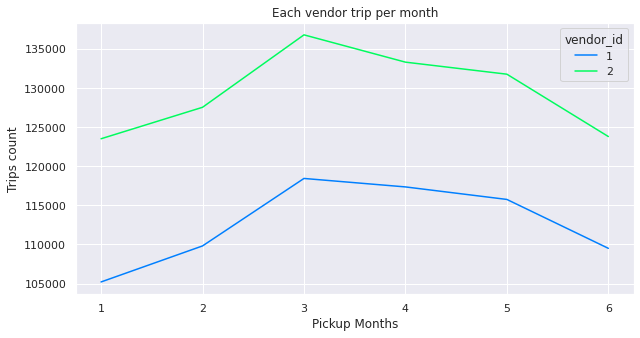

In [ ]:
# ploting line graph to visualize the monthly trand for each vendor

mnthly_pickup_vndr.plot(kind = 'line', figsize = (10,5))

plt.title('Each vendor trip per month')

plt.xlabel('Pickup Months')
plt.ylabel('Trips count')

plt.show()

### **Inference :**
* We can see that both the vendors have the highest strips during the month of march and lowest at the jan, feb, and after june.

**Checking each monthly average trip duration**

In [ ]:
mnthly_avg_duration = data.groupby(['pickup_month'])['trip_duration'].agg(np.median)
mnthly_avg_duration.index

array([631., 637., 654., 676., 691., 696.])

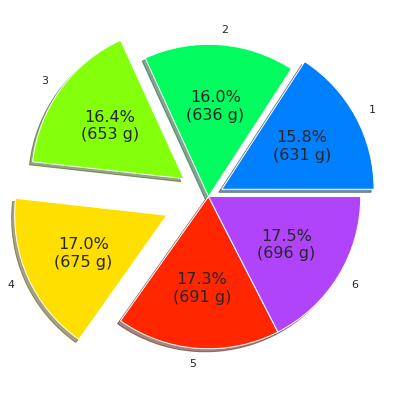

In [ ]:
#Ploting pie plot for monthly average sale
months = mnthly_avg_duration.index.tolist()

avg_values = mnthly_avg_duration.values

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(avg_values,
                                  autopct = lambda pct: func(pct, avg_values),
                                  explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0),
                                  labels = months, shadow = True)


plt.show()

**We can observe that least trip duration occured in january and highest started occuring after the month of march.**

* <b> Checking monthly trip duration</b>

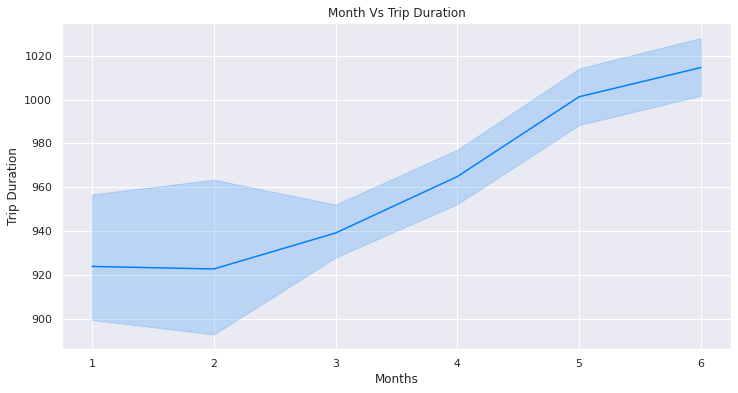

In [ ]:
# Ploting bar graph to get the each month Trip Duration.

plt.figure(figsize = (12, 6))

sns.lineplot(x = 'pickup_month', y = 'trip_duration', data = data)

plt.title('Month Vs Trip Duration')
plt.xlabel('Months')
plt.ylabel('Trip Duration')

plt.show()

# Inference :

* As we can see that trip duration start increases from 3rd month before that it is quite constant.

**Comparing trip_duration and distance.**

In [ ]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
dropoff_month                  int64
pickup_weekday                 int64
dropoff_weekday                int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
pickup_day                     int64
dropoff_day                    int64
trip_distance                float64
pickup_day_time               object
dropoff_day_time              object
dtype: object

Text(0.5, 1.0, 'Distance and Duration')

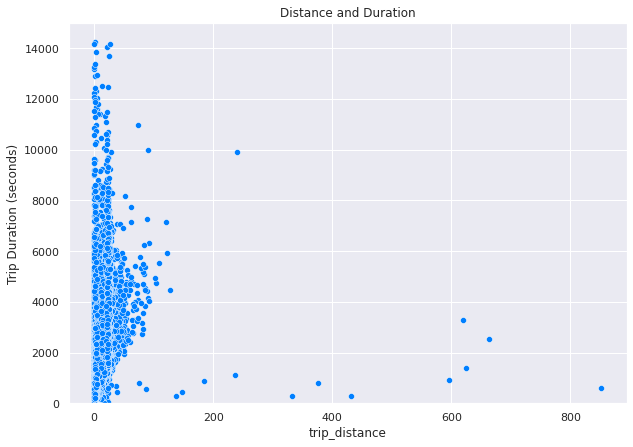

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(x="trip_distance",y="trip_duration",data=data)
plt.ylim(0,15000)
plt.ylabel('Trip Duration (seconds)')

plt.title('Distance and Duration')

### **Inference :**
* **We can see that 0-100 km distance hace the dense trip durations.**

**Comparing mean distance for each hour**

In [ ]:
hourly_mean_distance = data.groupby(['pickup_hour'])['trip_distance'].agg(np.mean)
hourly_mean_distance

pickup_hour
0     3.184799
1     3.110708
2     2.994314
3     3.288637
4     4.228890
5     5.086320
6     3.711506
7     2.902450
8     2.547023
9     2.477506
10    2.559330
11    2.635543
12    2.622815
13    2.843901
14    3.002872
15    3.013304
16    3.105327
17    2.845433
18    2.573426
19    2.538621
20    2.818720
21    2.896150
22    2.993750
23    3.200863
Name: trip_distance, dtype: float64

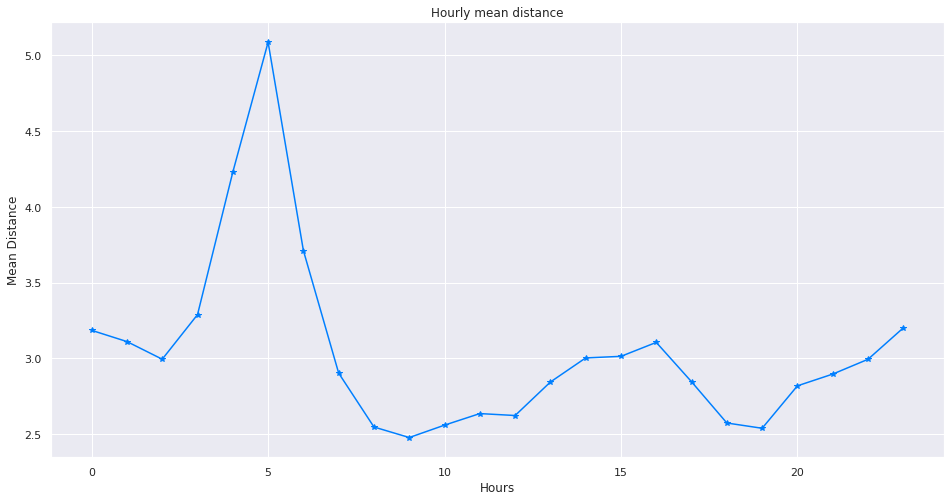

In [ ]:
# Ploting houly mean distane using line plot to visualizethe trend

hourly_mean_distance.plot(marker = '*', figsize = (16, 8))

plt.title('Hourly mean distance')

plt.xlabel('Hours')
plt.ylabel('Mean Distance')

plt.show()

### **Inference :**
* The longest average distance is travelled from late at night until early in the morning.

### Checking Correlatioin Between the features so that we can get the proper independent features.

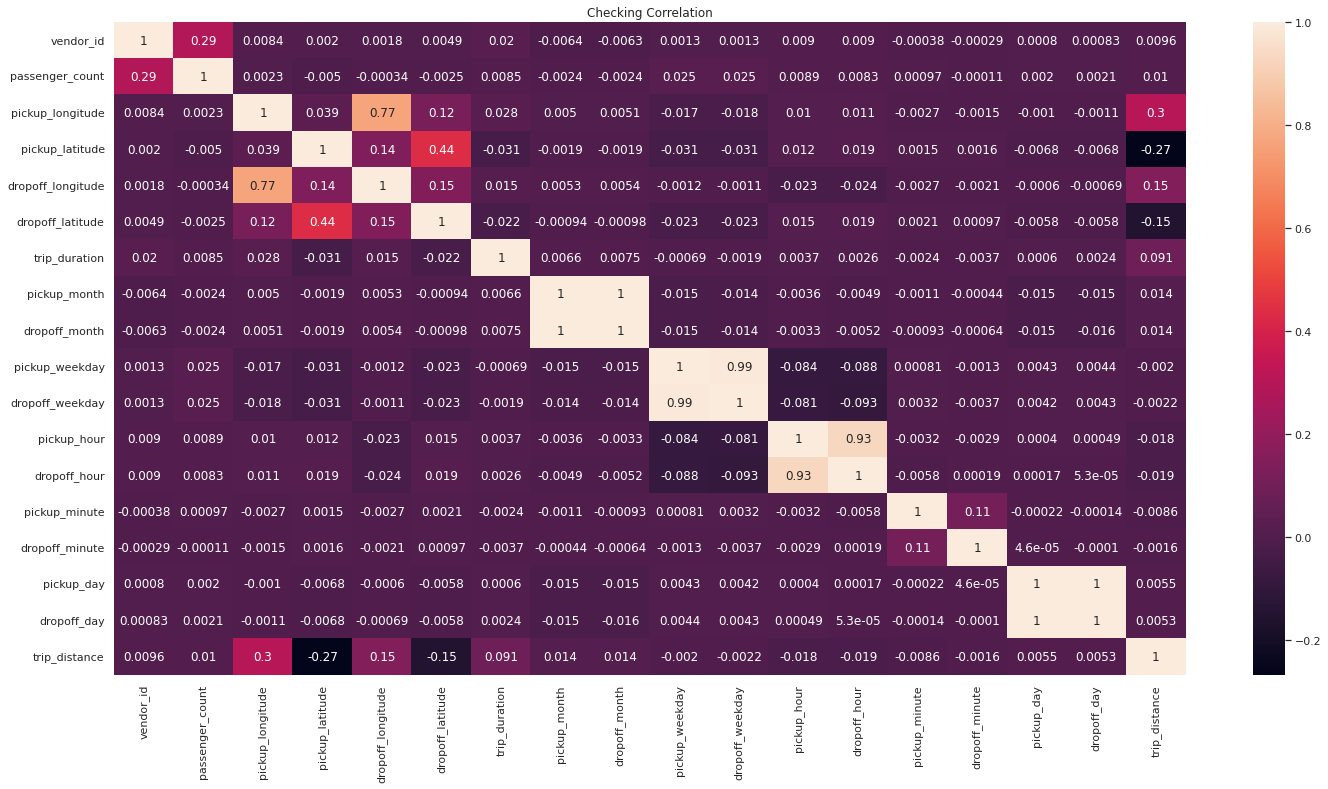

In [ ]:
# Checking Correlation

plt.figure(figsize=(24,12))

cor = data.corr() # getting correlation using corr() function

sns.heatmap(cor, annot=True, annot_kws={"size":12})

plt.title("Checking Correlation")
plt.show()

* Here we can see that there are lots of correlated features let us detect by defining a function that will extract correlated features for us.

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Calling the finction with threshold value 0.95

corr_features = correlation(data, 0.95)
print('Number of correlated features :',len(set(corr_features))) # getting the length of the number of correlated features

Number of correlated features : 3


In [ ]:
print('Correlated Features :')
corr_features

Correlated Features :


{'dropoff_day', 'dropoff_month', 'dropoff_weekday'}

# Inference :
* As we can see that **'dropoff_day', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday'** are highly corelated we can drop these features

In [ ]:
data.drop(['dropoff_day', 'dropoff_month', 'dropoff_weekday'], axis = 1, inplace = True)

In [ ]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
pickup_weekday                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
pickup_day                     int64
trip_distance                float64
pickup_day_time               object
dropoff_day_time              object
dtype: object

* We successfully droped our correlated features

In [ ]:
# Again checking our shape of data

print('shape of data :',data.shape)

shape of data : (1452692, 21)


 * Now we have 20 features and 1 dependent(Target) variable in our dataset

 * But we also drop id column from our dataset as it has no use for now.

In [ ]:
data.drop(['id'], axis = 1, inplace = True)

In [ ]:
# Again checking our shape of data

print('shape of data :',data.shape)

# printing the number of numerical features and number of categorical features

num_col = data.select_dtypes(include = 'number')
print("\nThe number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

shape of data : (1452692, 20)

The number of Numerical columns are: 15

The number of Categorical columns are: 3


 * Now we have total 20 columns in which 15 numeric and 3 categorical columns and 2 are date_time columns in our dataset
 * But also some of our features are in categorical format let's change them into numerical features.

#### Using LabelEncoder form sklearn library

In [ ]:
# Taking all categorical column list to a variable cols
cols = data.select_dtypes(include = 'object').columns.tolist()

In [ ]:
# importing LabelEncoder from sklearn

from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
labels = LabelEncoder()

for i in cols:

    # Using .fit_transform function to fit label
    # encoder and return encoded label
    data[i] = labels.fit_transform(data[i])


In [ ]:
# printing the number of numerical features and number of categorical features

num_col = data.select_dtypes(include = 'number')
print("\nThe number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))


The number of Numerical columns are: 18

The number of Categorical columns are: 0


In [ ]:
data.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
pickup_month                   int64
pickup_weekday                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
pickup_day                     int64
trip_distance                float64
pickup_day_time                int64
dropoff_day_time               int64
dtype: object

* Here we can see that we have 2 columns in date time format from which we have extracted many useful features and now we have not use beacause we already have extracted main features from these two date_timeformat features.


* Now we will also drop these variables

In [ ]:
data.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)

In [ ]:
data.dtypes

vendor_id               int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int64
trip_duration           int64
pickup_month            int64
pickup_weekday          int64
pickup_hour             int64
dropoff_hour            int64
pickup_minute           int64
dropoff_minute          int64
pickup_day              int64
trip_distance         float64
pickup_day_time         int64
dropoff_day_time        int64
dtype: object

* We successfully droped our Datetime format columns

In [ ]:
# Again checking our shape of data

print('shape of data :',data.shape)

shape of data : (1452692, 18)


* Now we can see that we have

<b> total 17 columns in which 1 target variable which is trip_duration</b>

#### Seperating out features and target variables to x and y variables

In [ ]:
# first we make a copy of out data set to a new variable

new_data = data.copy()

In [ ]:
# seperating our data in feature and target varibles
x = new_data.drop(['trip_duration'], axis = 1)

# taking our target variable into log form
# as we saw in previous analysis that using log for on
# trip_duration column it is behaving somewhatnormal distribution

y = np.log(new_data['trip_duration']).values

### **Spliting our data into train and test variables**

In [ ]:
# using train test split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# giving 30% data for testing and 70% for training the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1016884, 17), (435808, 17), (1016884,), (435808,))

# Modeling Without Standardizing the features

In [ ]:
# importing Linear regression from sklearn
from sklearn.linear_model import LinearRegression

# importing various matrics that well help us to analyze our regression model

from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

# importing decision tree regressor from sklearn

from sklearn.tree import DecisionTreeRegressor

# importing randon forest regressor from sklearn

from sklearn.ensemble import RandomForestRegressor

# Importing XGBOOST

import xgboost

### Defining a function that will take training and testing data and train our model and provide us the results

In [ ]:
# list of models

models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]

# function that will fit our models and train our models
def modeling(models):
    scores = []

    for i in models:

        if i == LinearRegression:

            # Creating instance for our model
            model = LinearRegression()

            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('Prediction by LinearRegression :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model, model.predict(x_test)))


        elif i == DecisionTreeRegressor:

            # Creating instance for our model
            model = DecisionTreeRegressor(criterion = 'mse', max_depth = 10)

            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('\nPrediction by DecisionTreeRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))


        elif i == RandomForestRegressor:

             # Creating instance for our model
            model = RandomForestRegressor(criterion = 'mse', n_estimators = 10 ,
                                              max_depth = 10)

            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))


    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']))


In [ ]:
# Function that will calculate the accuracy, r2 and RMSE scores

def model_results(model,y_predicted):

    # getting Training Accuracy
    train_scr = model.score(x_train, y_train)

    #getting Test Accuracy
    test_scr = model.score(x_test, y_test)

    # getting R2 score
    r2_scr = r2_score(y_test, y_predicted)

    #Getting Adjusted R2 score
    p = x.shape[1]
    n = y_test.shape[0]
    a = (1 - r2_scr)
    b = (n - 1) / (n - p - 1)
    adj_r2_scr = (1 - (a * b))

    #getting mse
    mse = mean_squared_error(y_test,y_predicted)

    # getting RMSE
    rmse = np.sqrt(mse)

    matrics_name = ['Training_Score', 'Testing_Score', 'R2_Score', 'ADJ_R2', 'MSE', 'RMSE']
    matrics_value = [train_scr, test_scr, r2_scr, adj_r2_scr, mse, rmse]

    total_matrics = dict(zip(matrics_name,matrics_value))

    df = pd.DataFrame(data = [total_matrics])
    return df

In [ ]:
# Function to plot the Regression graphs that will show the relation between actual and predicted values

def tr_vs_pred_plot(actual,predicted):

  plt.figure(figsize = (6,3))

  fig, ax = plt.subplots()

  # scatter plot between actual and predicted values
  ax.scatter(actual, predicted)

  #getting the line which is our prediction line
  # through min and max of the values
  ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], '--', lw = 3)

  ax.set_xlabel('Actual_Values(Time_Duration)')

  ax.set_ylabel('Predicted_Values(Time_Duration)')

  plt.show()

In [ ]:
# Funtion that will plot the R2 score comparision graph

def R2_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our r2 scores
  r2_data = results['R2_Score']

  # ploting r2 values
  r2_data.plot(kind="bar", legend=False)

  plt.title("R2 SCORE COMPARISION PLOT")

  plt.show()

In [ ]:
# Funtion that will plot the RMSE score comparision graph

def RMSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['RMSE']

  # ploting RMSE values
  mse_data.plot(kind="bar", legend=False)

  plt.title("RMSE SCORE COMPARISION PLOT")

  plt.show()

In [ ]:
# Funtion that will plot the RMSE score comparision graph

def MSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['MSE']

  # ploting RMSE values
  mse_data.plot(kind="bar", legend=False)

  plt.title("MSE SCORE COMPARISION PLOT")

  plt.show()

Prediction by LinearRegression :
 [6.18356781 6.31477087 6.33519415 ... 6.23102248 6.31761088 6.32491259]


<Figure size 432x216 with 0 Axes>

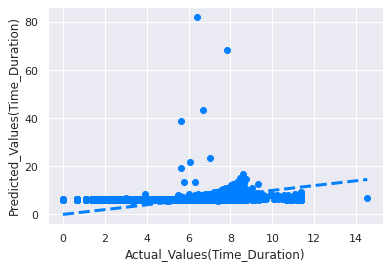


Prediction by DecisionTreeRegressor :
 [5.45137781 6.10817908 6.10817908 ... 6.15469191 6.20451907 6.6803103 ]


<Figure size 432x216 with 0 Axes>

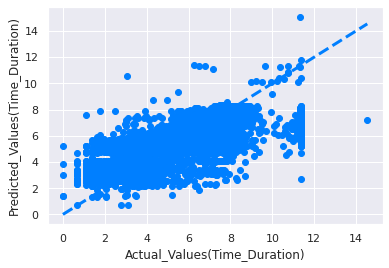


Prediction by RandomForestRegressor :
 [5.59537385 6.13032456 6.13110534 ... 6.110809   6.23688093 6.69233249]


<Figure size 432x216 with 0 Axes>

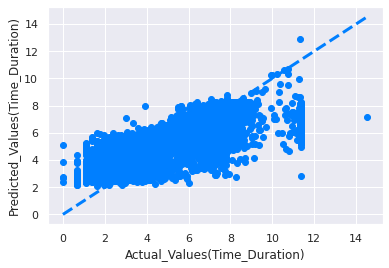

In [ ]:
# Executing our models
result_1 = modeling(models)

In [ ]:
result_1

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.298175,0.274146,0.274146,0.274117,0.449004,0.670078
Decision Tree Regression,0.610109,0.601903,0.601903,0.601887,0.246258,0.496244
Random Forest Regression,0.627799,0.621592,0.621592,0.621577,0.234078,0.483816


### **Let us use one more ensemble based model which is XGBOOST which use Boosting as well as Column and Row sampling simultaneously and check how it will perform.**

#### XGBoost Regression Model without stadardizing our features

In [ ]:
# Importing XGBOOST
import xgboost

In [ ]:
# Creating instance for our XGBoost
xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

# fitting our model using .fit funtion
xgb_reg.fit(x_train, y_train)

# taking prediction from our model using .predict function
y_pred = xgb_reg.predict(x_test)

print('Pridicted Value\n')
y_pred

[06:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pridicted Value



array([5.4479866, 5.7337475, 5.5706224, ..., 5.9775095, 6.064411 ,
       6.6388474], dtype=float32)

**XGBOOST RESGRESSION PLOT**

<Figure size 432x216 with 0 Axes>

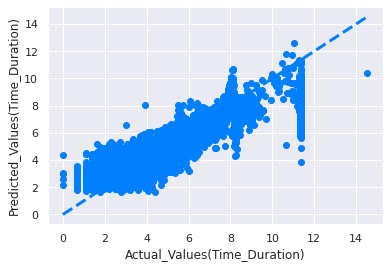

In [ ]:
# Using our defined funtion that will plot regresson plot.
tr_vs_pred_plot(y_test,y_pred)

In [ ]:
# checking the result of our regression model by calculating
# Train and Test accuracy , r2 score and also RMSE scores
result_2 = model_results(xgb_reg,y_pred)
result_2 = result_2.set_index(pd.Series(['XGBOOST']))


**Checking our model results**
* Training Accuracy
* Testing Accuracy
* R2 Socre
* RMSE

In [ ]:
total_result_1 = pd.concat([result_1,result_2])
total_result_1

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.298175,0.274146,0.274146,0.274117,0.449004,0.670078
Decision Tree Regression,0.610109,0.601903,0.601903,0.601887,0.246258,0.496244
Random Forest Regression,0.627799,0.621592,0.621592,0.621577,0.234078,0.483816
XGBOOST,0.924322,0.907907,0.907907,0.907904,0.056967,0.238678


**Plotting R2 score comparision between the model we have applied**

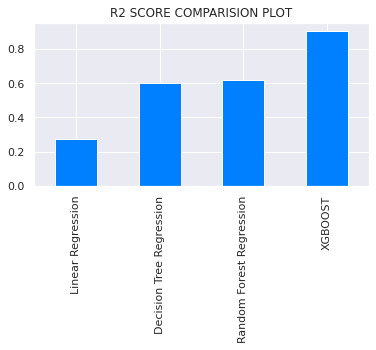

In [ ]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(total_result_1.index, total_result_1)

**Plotting RMSE score comparision between the model we have applied**

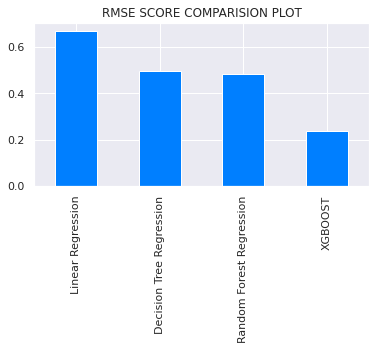

In [ ]:
# # Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(total_result_1.index, total_result_1)

**Plotting MSE score comparision between the model we have applied**

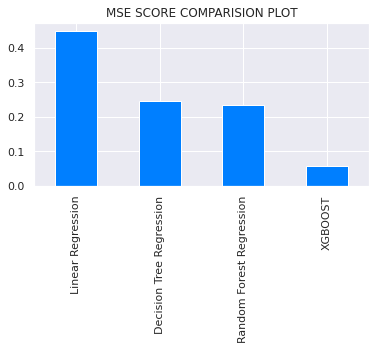

In [ ]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(total_result_1.index, total_result_1)

# **Inference :**

* **Linear Regression** model is **not performing well at all** in terms of **accuracy measure which is not up to the mark** and also in term of **R2 which is very low** and **RMSE which is quite high.**

* **Decision Tree Regressor** and **Random Forest Regressor** are doing **somewhat better that Linear regression** in **terms of all matrics Accuracy , R2 and RMSE** evaluation.

* **But Random Forest Regressor is slightly better than the Decision Tree Regressor** in **terms of accuracy as well as in terms of R2 Score and RMSE** evaluation also.

* **As we can see that XGBOOST is doing a great job and provide us great accuracy of  training and Testing are far better and also R2 score is quite well than other model and RMSE value is also very low.**

# Modeling With Standardized features

* Spliting our data into train and test and we have dividing our data 30% for testing and 70% for training the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1016884, 17), (435808, 17), (1016884,), (435808,))

### Standardizing our features using standard scaler from sklearn

In [ ]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating instance for our standard scaler

scaler = StandardScaler()

In [ ]:
# Standadizing our data x_train and x_test

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

* Now we have stadardized features

Prediction by LinearRegression :
 [6.37009524 6.2790079  8.70946684 ... 6.44494625 6.5495651  6.50991215]


<Figure size 432x216 with 0 Axes>

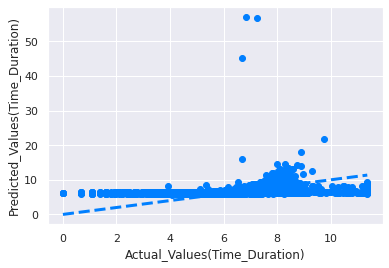


Prediction by DecisionTreeRegressor :
 [6.15151725 5.78913252 7.48725489 ... 6.56134204 7.02323542 6.985681  ]


<Figure size 432x216 with 0 Axes>

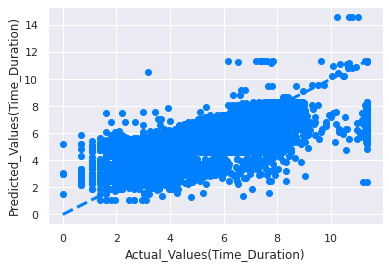


Prediction by RandomForestRegressor :
 [6.32379861 5.87575672 7.54480402 ... 6.55209556 7.04775131 6.9717001 ]


<Figure size 432x216 with 0 Axes>

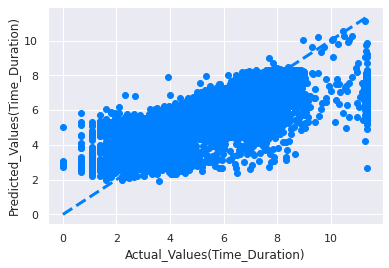

In [ ]:
result_3 = modeling(models)

#### XGBoost Regression Model with stadardizing our features

In [ ]:
# Creating instance for our XGBoost
xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

# fitting our model using .fit funtion
xgb_reg.fit(x_train, y_train)

# taking prediction from our model using .predict function
y_pred = xgb_reg.predict(x_test)

print('Pridicted Value')
y_pred

[06:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pridicted Value


array([6.532787 , 6.9477534, 7.565454 , ..., 6.530839 , 7.149344 ,
       6.823172 ], dtype=float32)

**XGBOOST REGRESSION PLOT**

<Figure size 432x216 with 0 Axes>

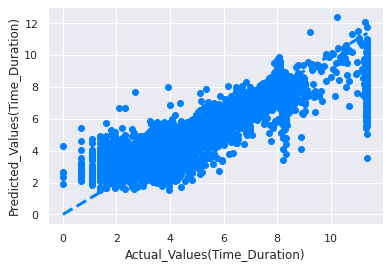

In [ ]:
# Using our defined funtion that will plot regression chart.

tr_vs_pred_plot(y_test,y_pred)

In [ ]:
# checking the result of our regression model by calculating
# Train and Test accuracy , r2 score and also RMSE scores
result_4 = model_results(xgb_reg,y_pred)
result_4 = result_4.set_index(pd.Series(['XGBOOST']))

**Checking our model results**
* Training Accuracy
* Testing Accuracy
* R2 Socre
* RMSE

In [ ]:
final_result_2 = pd.concat([result_3,result_4])
final_result_2

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.290377,0.292821,0.292821,0.292794,0.435413,0.659858
Decision Tree Regression,0.612110,0.600369,0.600369,0.600354,0.246054,0.496039
Random Forest Regression,0.631115,0.621728,0.621728,0.621713,0.232904,0.482601
XGBOOST,0.921048,0.903219,0.903219,0.903215,0.059589,0.244108


**Plotting R2 score comparision between the model we have applied**

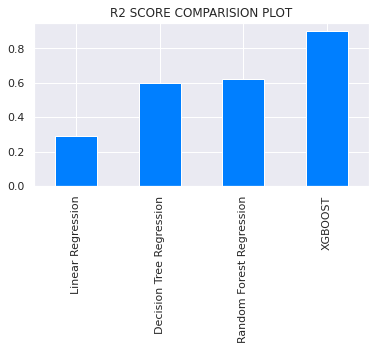

In [ ]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(final_result_2.index, final_result_2)

**Plotting RMSE score comparision between the model we have applied**

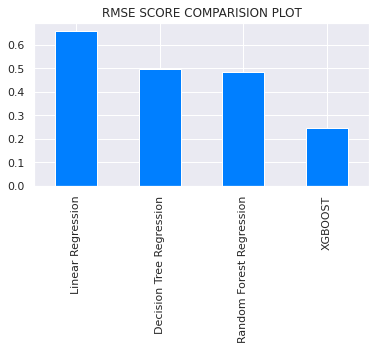

In [ ]:
# Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(final_result_2.index , final_result_2)

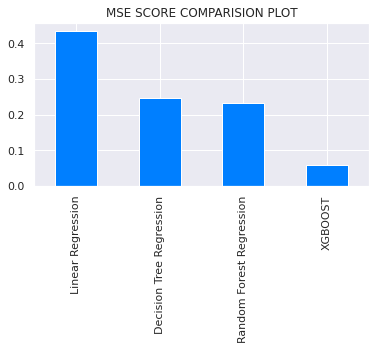

In [ ]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(final_result_2.index, final_result_2)

# **Inference :**
* **As the results shows that there is not that much change in our resultant metrics even almost same results we are getting after standardinzing our features.**

* **Let us use one XGBOOST on standardized features and check out our results.**

* **From resultant matrics we can observe that there is no change in our performance of our model but even decresed the performance of our XGBOOST model little bit.**

## **Selecting features using Backward Elimination Method(using OLS)**
* Backward elimination is a feature selection approach used in the construction of a machine learning model.
It is used to exclude characteristics that have no influence on the dependent variable or prediction of output.

SL - Significance Level = 0.05

In [ ]:
# seperating our data in feature and target varibles
x = new_data.drop(['trip_duration'], axis = 1)

y = np.log(new_data['trip_duration']).values

In [ ]:
import statsmodels.regression.linear_model as sm

# choose a Significance level usually 0.05, if p>0.05
# for the highest values parameter, remove that value

ols = sm.OLS(endog = y, exog = x).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          8.164e+06
Date:                Sat, 09 Jul 2022   Prob (F-statistic):                        0.00
Time:                        06:37:21   Log-Likelihood:                     -1.4650e+06
No. Observations:             1452692   AIC:                                  2.930e+06
Df Residuals:                 1452675   BIC:                                  2.930e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
vendor_id              0.0149      0.001     12.861      0.000       0.013       0.017
passenger_count        0.0073      0.000     16.644      0.000       0.006       0.008
pickup_longitude      -1.3790      0.013   -107.118      0.000      -1.404      -1.354
pickup_latitude        0.3184      0.018     18.051      0.000       0.284       0.353
dropoff_longitude      0.9228      0.012     74.530      0.000       0.899       0.947
dropoff_latitude      -0.9955      0.016    -60.483      0.000      -1.028      -0.963
store_and_fwd_flag     0.0152      0.007      2.038      0.042       0.001       0.030
pickup_month           0.0191      0.000     58.429      0.000       0.018       0.020
pickup_weekday        -0.0090      0.000    -31.635      0.000      -0.010      -0.008
pickup_hour            0.0041      0.000     17.101      0.000       0.004       0.005
dropoff_hour          -0.0006      0.000     -2.640      0.008      -0.001      -0.000
pickup_minute         -0.0003    3.2e-05     -8.658      0.000      -0.000      -0.000
dropoff_minute        -0.0001   3.18e-05     -3.451      0.001      -0.000   -4.75e-05
pickup_day             0.0008   6.32e-05     11.991      0.000       0.001       0.001
trip_distance          0.0970      0.000    758.135      0.000       0.097       0.097
pickup_day_time       -0.0421      0.002    -24.666      0.000      -0.045      -0.039
dropoff_day_time      -0.0110      0.002     -6.632      0.000      -0.014      -0.008
==============================================================================
Omnibus:                  1384857.954   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4169163274.591
Skew:                          -3.326   Prob(JB):                         0.00
Kurtosis:                     265.364   Cond. No.                     5.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Inference :
* We are not getting any feature having greater significance leven than **0.05**

**Now we will use XGBOOST Feature Selection to get the best feature that will enhance our model performance**

In [ ]:
#Using Feature importance attibute of XGBOOST to get the feature importance of each feature
features_importance = xgb_reg.get_booster().get_score(importance_type='weight')

feature_data = pd.DataFrame(data=features_importance.values(),
                            index=features_importance.keys(),
                            columns=["score"]).sort_values(by = "score", ascending=False)



In [ ]:
# Getting the feature importance values fromthe feature_importance_ attribute of XGBOOST

xgb_reg.feature_importances_

array([0.02137325, 0.00725311, 0.0176475 , 0.05593332, 0.03015019,
       0.04447869, 0.00697989, 0.01893778, 0.04248658, 0.05073982,
       0.04782189, 0.07503105, 0.09361815, 0.0102162 , 0.42088106,
       0.03389253, 0.02255898], dtype=float32)

In [ ]:
# Creating Dataframe that will contain all the features with its importance to the model

ft_imp = pd.DataFrame(data=features_importance.values(),
                      index=x.columns,
                      columns=["score"]).sort_values(by = "score", ascending=False)
ft_imp

,score
vendor_id,10837
passenger_count,9231
pickup_longitude,8846
dropoff_hour,7249
pickup_hour,7038
dropoff_longitude,6849
trip_distance,5147
pickup_latitude,4494
pickup_day,2568
store_and_fwd_flag,2485


<Figure size 864x432 with 0 Axes>

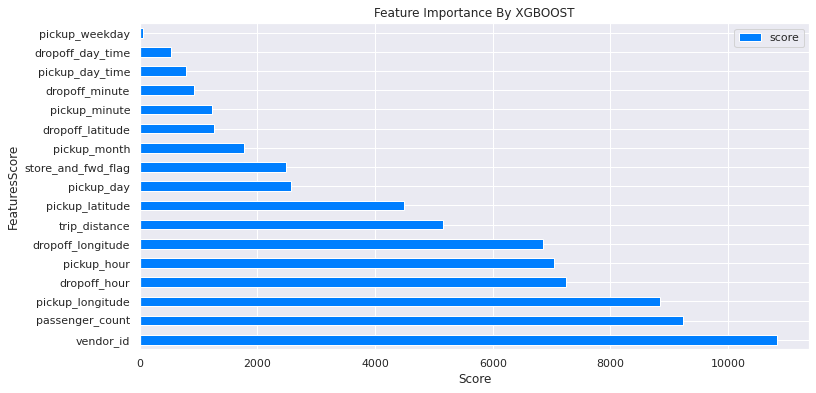

In [ ]:
# Ploting Bar Chart for the feature importance by XGBOOST
plt.figure(figsize = (12,6))

ft_imp.plot(kind = 'barh', figsize = (12,6))

plt.title('Feature Importance By XGBOOST')

plt.xlabel('Score')
plt.ylabel('FeaturesScore')

plt.show()

###  Backward Feature selection has not provided any feature to eliminate but considering XGBOOST Feature importance we can **drop pickup_weakday** from our data set to train our model.

In [ ]:
x = new_data.drop(['pickup_weekday','trip_duration'], axis = 1)
y = np.log(new_data['trip_duration'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 321)

In [ ]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

Prediction by LinearRegression :
 [6.27392725 6.23409906 6.30083185 ... 6.36084629 6.35645906 6.39276337]


<Figure size 432x216 with 0 Axes>

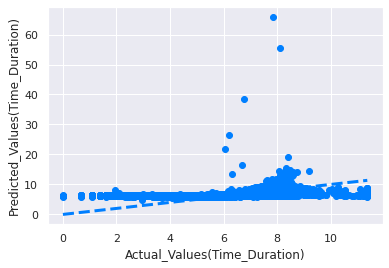


Prediction by DecisionTreeRegressor :
 [6.32336712 6.20803492 6.12295616 ... 5.88911484 6.17674062 6.92085982]


<Figure size 432x216 with 0 Axes>

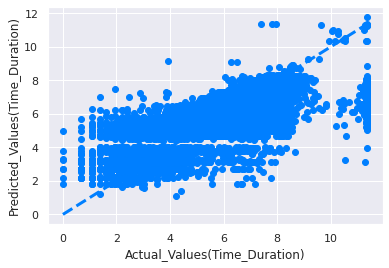


Prediction by RandomForestRegressor :
 [6.31213197 6.23268855 6.12532507 ... 5.82761044 6.53916969 6.96606565]


<Figure size 432x216 with 0 Axes>

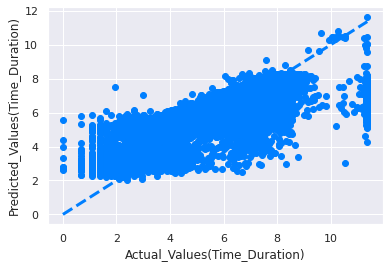

In [ ]:
output = modeling(models)

In [ ]:
output

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.291326,0.289767,0.289767,0.289740,0.440513,0.663711
Decision Tree Regression,0.611536,0.601967,0.601967,0.601952,0.246875,0.496865
Random Forest Regression,0.626295,0.618276,0.618276,0.618262,0.236759,0.486579


In [ ]:
# Creating instance for our XGBoost
xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

# fitting our model using .fit funtion
xgb_reg.fit(x_train, y_train)

# taking prediction from our model using .predict function
y_pred = xgb_reg.predict(x_test)

print('Pridicted Value\n')
y_pred

[06:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pridicted Value



array([5.7306614, 6.3748674, 6.1043887, ..., 5.3795404, 6.8314714,
       6.662749 ], dtype=float32)

**XGBOOST RESGRESSION PLOT**

<Figure size 432x216 with 0 Axes>

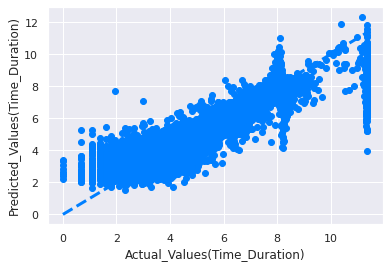

In [ ]:
# Using our defined funtion that will plot regresson plot.
tr_vs_pred_plot(y_test,y_pred)

In [ ]:
# checking the result of our regression model by calculating
# Train and Test accuracy , r2 score and also RMSE scores
output_1 = model_results(xgb_reg,y_pred)
output_1 = output_1.set_index(pd.Series(['XGBOOST']))


**Checking our model results**
* Training Accuracy
* Testing Accuracy
* R2 Socre
* RMSE

In [ ]:
total_output = pd.concat([output, output_1])
total_output

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.291326,0.289767,0.289767,0.289740,0.440513,0.663711
Decision Tree Regression,0.611536,0.601967,0.601967,0.601952,0.246875,0.496865
Random Forest Regression,0.626295,0.618276,0.618276,0.618262,0.236759,0.486579
XGBOOST,0.934265,0.916914,0.916914,0.916911,0.051533,0.227009


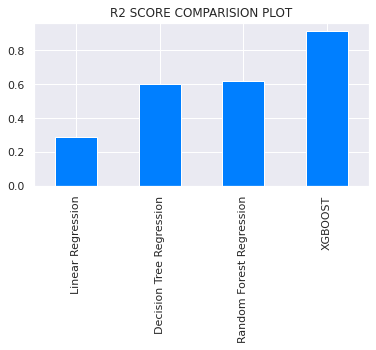

In [ ]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(total_output.index, total_output)

**Plotting RMSE score comparision between the model we have applied**

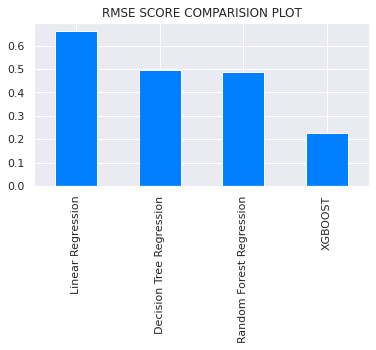

In [ ]:
# # Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(total_output.index, total_output)

**Plotting MSE score comparision between the model we have applied**

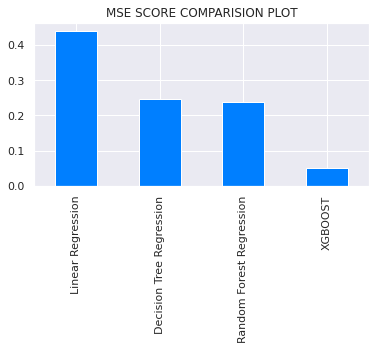

In [ ]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(total_output.index, total_output)

### **We can observe that there is not that much impact on the results after choosing the features through feature importance as well as backward elimination method.**

## Let us now consider another approach in which we are going to us **PCA(Principle Component Analysis approach to reduce our dimension** of the features and check out results.

**As we know PCA needs Transformed features so we will use standard scaler to transform our features and then apply PCA to them.**

In [ ]:
new_data = data.copy()

In [ ]:
x = new_data.drop(['trip_duration'], axis = 1)
y = np.log(new_data['trip_duration']).values

**Spliting our data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 321)

In [ ]:
# Standadizing our data x_train and x_test

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
#Applying PCA

from sklearn.decomposition import PCA

#creating instance for pca

pca = PCA(n_components = len(new_data.drop(['trip_duration'], axis = 1).columns))

# fitting data to PCA
pca.fit_transform(x_train)

# Getting the variance bring by PCA

var_rat = pca.explained_variance_ratio_
var_rat

array([0.15394038, 0.11089828, 0.09281196, 0.07710074, 0.07543059,
       0.06541576, 0.06000118, 0.05823666, 0.05807009, 0.05719896,
       0.05217736, 0.04197324, 0.0414597 , 0.03318035, 0.01537253,
       0.00378515, 0.00294709])

<BarContainer object of 17 artists>

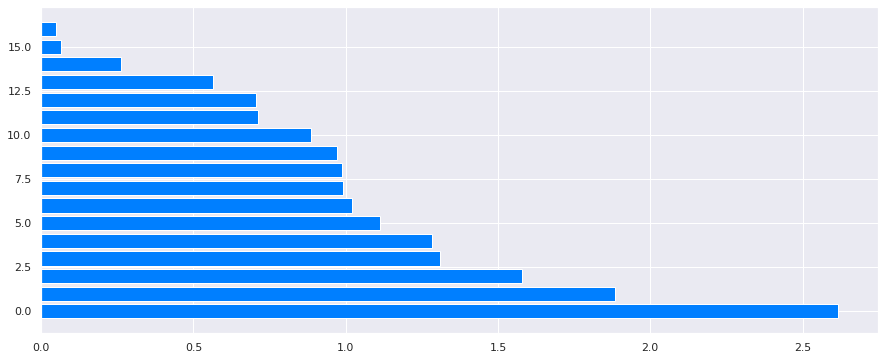

In [ ]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.barh(np.arange(pca.n_components_), pca.explained_variance_)

Text(0.5, 1.0, 'Elbow Plot')

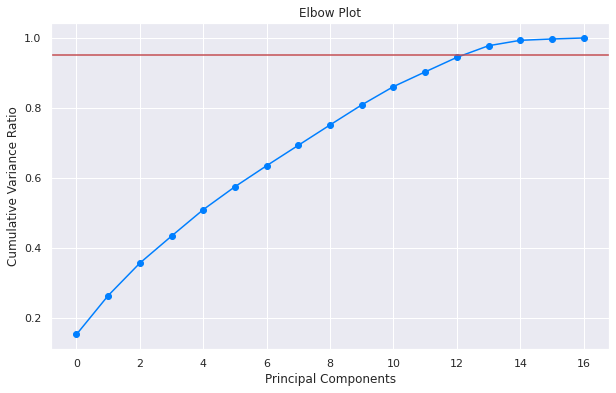

In [ ]:
# plotting Cumulative Variance Ratio using elbow plot

plt.figure(figsize=(10,6))

plt.plot(np.cumsum(var_rat), marker='o')

plt.axhline(y = 0.95, color = 'r', linestyle = '-')

plt.xlabel("Principal Components")

plt.ylabel("Cumulative Variance Ratio")

plt.title('Elbow Plot')

**We can observe that 12 PCA components explaining the variance more than 90%**
**We will go with 12 pca components to train our model let us check results**

In [ ]:
#Applying PCA as per required components


pca = PCA(n_components = 12)

# taking transformed features to a variable
transform = pca.fit_transform(x)

# Getting the explained variance by PCA to 12 features

pca.explained_variance_

array([3.35992453e+02, 2.67612014e+02, 8.05281597e+01, 7.57475325e+01,
       1.97092578e+01, 3.80049632e+00, 2.86733984e+00, 2.81283219e+00,
       1.77128357e+00, 1.74738199e+00, 2.25150447e-01, 5.49985549e-02])

In [ ]:
# checking the shape of the new reduced dimension features
transform.shape

(1452692, 12)

In [ ]:
#not soliting our data to x and y by providing transfomed and reduced dimesion features

x = transform #PCA transformed feaures

y = np.log(new_data['trip_duration']).values

**Spliting our data into train and test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 321)

Prediction by LinearRegression :
 [6.32977698 6.27196229 6.32461055 ... 6.3793514  6.29408681 6.43390737]


<Figure size 432x216 with 0 Axes>

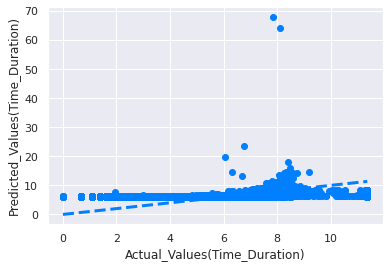


Prediction by DecisionTreeRegressor :
 [5.48459099 6.49032147 6.39309174 ... 5.48344784 6.57760045 6.65824282]


<Figure size 432x216 with 0 Axes>

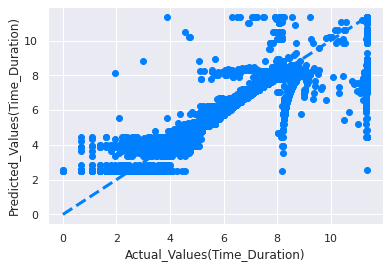


Prediction by RandomForestRegressor :
 [5.48848836 6.48942904 6.3933283  ... 5.48150012 6.57760131 6.65861976]


<Figure size 432x216 with 0 Axes>

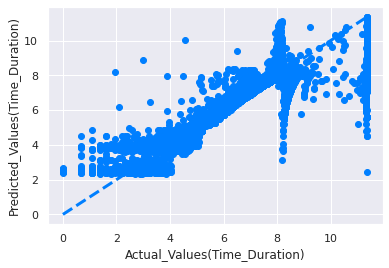

In [ ]:
# Training our model
result_1 = modeling(models)

In [ ]:
# Results from our models
result_1

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.283090,0.283905,0.283905,0.283886,0.444148,0.666444
Decision Tree Regression,0.965253,0.957100,0.957100,0.957098,0.026608,0.163121
Random Forest Regression,0.967994,0.962333,0.962333,0.962332,0.023363,0.152849


#### XGBoost Regression Model

In [ ]:
# Importing XGBOOST
import xgboost

In [ ]:
# Creating instance for our XGBoost
xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

# fitting our model using .fit funtion
xgb_reg.fit(x_train, y_train)

# taking prediction from our model using .predict function
y_pred = xgb_reg.predict(x_test)

print('Pridicted Value\n')
y_pred

[06:53:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pridicted Value



array([5.5094056, 6.4874873, 6.3909173, ..., 5.4760265, 6.576179 ,
       6.654387 ], dtype=float32)

**XGBOOST RESGRESSION PLOT**

<Figure size 432x216 with 0 Axes>

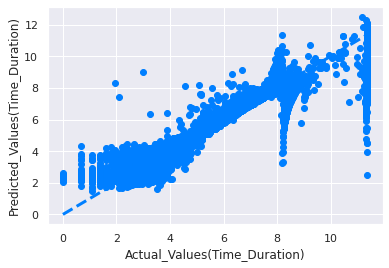

In [ ]:
# Using our defined funtion that will plot regresson plot.
tr_vs_pred_plot(y_test,y_pred)

In [ ]:
# checking the result of our regression model by calculating
# Train and Test accuracy , r2 score and also RMSE scores
result_2 = model_results(xgb_reg,y_pred)
result_2 = result_2.set_index(pd.Series(['XGBOOST']))


**Checking our model results**
* Training Accuracy
* Testing Accuracy
* R2 Socre
* RMSE

In [ ]:
# Overall Result of all models
total_result_1 = pd.concat([result_1,result_2])
total_result_1

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.283090,0.283905,0.283905,0.283886,0.444148,0.666444
Decision Tree Regression,0.965253,0.957100,0.957100,0.957098,0.026608,0.163121
Random Forest Regression,0.967994,0.962333,0.962333,0.962332,0.023363,0.152849
XGBOOST,0.979301,0.971078,0.971078,0.971077,0.017938,0.133934


**Plotting R2 score comparision between the model we have applied**

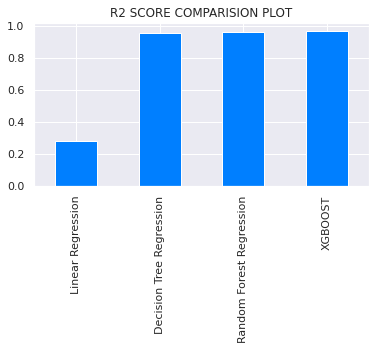

In [ ]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(total_result_1.index, total_result_1)

**Plotting RMSE score comparision between the model we have applied**

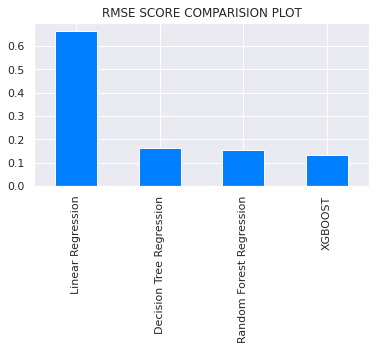

In [ ]:
# # Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(total_result_1.index, total_result_1)

**Plotting MSE score comparision between the model we have applied**

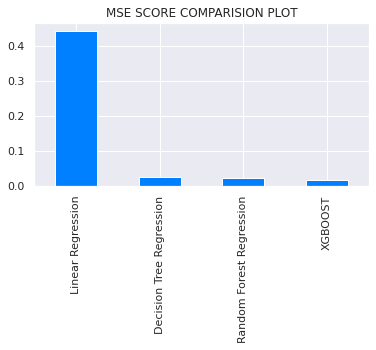

In [ ]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(total_result_1.index, total_result_1)

# **Inference :**

* **Linear Regression** model is **not performing well at all.**

* **Here Decision Tree and Random Forrest are now performing very well after reducing Dimension of our features and also other evaluation matrics are showing decent results**

* **But Random Forest Regressor is slightly better than the Decision Tree Regressor** in **terms of accuracy as well as in terms of R2 Score and RMSE** evaluation also.

* **As we can see that XGBOOST is doing a great job and provide us great accuracy of training and Testing are far better and also R2 score is quite well than other model and RMSE value is also very low.**

## **Conclusion :**

* We can observe that we have applied multiple models with different approaches and we can clearly see that in all cases **XGBOOST was working very fine** **other than Decision Tree and Random Forest Regression**

* But after implementing the PCA to our features and we successfuly reduced our feature dimension and we observed that **after transformation Decision Tree and Random Forest is also doing great job even far better that without transformation**

* And also **XGBOOST is also working better after PCA transformation** and also **XGBOOST is also showing slightly better scores** in terms of **RMSE | MSE which is lesser than other models** and also **R2 | Adj R2 scores are also not having that much difference and also higher than other models.**

* So our **conclusion from this whole analysis is that we can go with XGBOOST Regressor** to get **Good Prediction rate and lesser Error prone** and also it can be more optimized using more tuned hyperparameters.

### **Future Work:**

* **As this data set is of only almost 6 months and I think there should be more data for more than a year and also some more features should be there so that we can train our models with more significant information that will help our model to learn more efficiently so that we can get more higher performance from Machine Learning Models**

* **And also we can extract more information about this data by getting more features so that we can explore more about this kind of data**